### 1. Preparación del Entorno de Trabajo

- Importar las librerias necesarias

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

### 2. Carga de Datos

- Carga el dataset en un DataFrame de Pandas.

In [3]:
df_original=pd.read_csv('Dataset_mcp1.csv')

### 3. Inspección Inicial de los Datos

- Visualiza las primeras y últimas filas del DataFrame.

In [4]:
df_original.head(2)

Campaign_ID    Channel Product_Category        Region    Budget     Spend  \
0     CAM0001  Billboard          Fashion  Kuala Lumpur  484341.0  197038.0   
1     CAM0002        NaN           Health       Sarawak  468792.0   33743.0   

   Impressions  Clicks     CTR  Conversions      CR   Revenue   ROI  Duration  \
0     545901.0     NaN  0.0785       7993.0  0.3414  849005.0  0.64     212.0   
1     527513.0  4130.0  0.9479       9459.0     NaN  921078.0  3.78      29.0   

  Start_Date    End_Date  Customer_Satisfaction  Campaign_Effectiveness  \
0   2/3/2023  23/12/2023                    3.0                     3.0   
1        NaN         NaN                    3.0                     7.0   

  Market_Segment  
0         Medium  
1         Medium

In [5]:
df_original.tail(2)

Campaign_ID       Channel Product_Category        Region    Budget  \
4998     CAM4999  Social Media      Electronics  Kuala Lumpur  120531.0   
4999     CAM5000            TV       Automotive         Sabah  476378.0   

         Spend  Impressions   Clicks     CTR  Conversions      CR   Revenue  \
4998  433558.0     857140.0   7037.0  0.2863       3374.0  0.9039  373110.0   
4999  261529.0     308009.0  45922.0  0.5187       3047.0  0.0438  146303.0   

       ROI  Duration Start_Date   End_Date  Customer_Satisfaction  \
4998  0.39      76.0  2/11/2023  23/8/2023                    2.0   
4999  0.77     330.0   1/1/2023  6/11/2023                    1.0   

      Campaign_Effectiveness Market_Segment  
4998                     1.0         Medium  
4999                     1.0           High

- Obtén información general del dataset.

In [6]:
df_original.describe()

Budget         Spend   Impressions         Clicks          CTR  \
count  4.500000e+03  4.501000e+03  4.496000e+03    4514.000000  4502.000000   
mean   3.196766e+05  2.754637e+05  6.050865e+05   27467.000985     0.585820   
std    7.511176e+05  3.985757e+05  1.643209e+06   23203.538244     0.800421   
min    1.001400e+04  1.000000e+00  1.593000e+03     104.000000     0.000500   
25%    1.379872e+05  1.113680e+05  2.624278e+05   12713.750000     0.250425   
50%    2.659450e+05  2.292810e+05  5.089675e+05   26232.000000     0.500150   
75%    3.855895e+05  3.445920e+05  7.663295e+05   38618.250000     0.760400   
max    4.175610e+07  4.317430e+06  9.991660e+07  250409.021300     9.570650   

        Conversions           CR       Revenue          ROI     Duration  \
count   4506.000000  4504.000000  4.491000e+03  4505.000000  4521.000000   
mean    5591.891502     0.556345  5.962208e+05     2.816823   200.590123   
std     5629.011928     0.580404  7.834836e+05     2.769284   173.398322   
min       13.000000     0.000300  0.000000e+00     0.000000     1.000000   
25%     2604.250000     0.261425  2.574585e+05     1.270000    94.000000   
50%     5076.500000     0.507450  5.093340e+05     2.610000   188.000000   
75%     7578.000000     0.755375  7.717310e+05     3.830000   278.000000   
max    67712.567350     7.369659  9.717200e+06    29.526004  1911.832921   

       Customer_Satisfaction  Campaign_Effectiveness  
count            4508.000000             4510.000000  
mean                3.491172                6.418550  
std                 4.180570                7.773072  
min                 1.000000                1.000000  
25%                 2.000000                3.000000  
50%                 3.000000                6.000000  
75%                 4.000000                8.000000  
max                46.055439               88.914949

- Identifica las columnas y su tipo de datos.

In [7]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Campaign_ID             4741 non-null   object 
 1   Channel                 4746 non-null   object 
 2   Product_Category        4733 non-null   object 
 3   Region                  4739 non-null   object 
 4   Budget                  4500 non-null   float64
 5   Spend                   4501 non-null   float64
 6   Impressions             4496 non-null   float64
 7   Clicks                  4514 non-null   float64
 8   CTR                     4502 non-null   float64
 9   Conversions             4506 non-null   float64
 10  CR                      4504 non-null   float64
 11  Revenue                 4491 non-null   float64
 12  ROI                     4505 non-null   float64
 13  Duration                4521 non-null   float64
 14  Start_Date              4741 non-null   

- Pasar todo a minúscula para evitar errores

In [8]:
df1 = df_original.apply(lambda x: x.str.lower() if x.dtype == "object" else x)

### 4. Limpieza de Datos

#### 4.1 Manejo de Valores Faltantes

- Identifica las columnas con valores faltantes.

Missing Values Count  Missing Values Percentage
Campaign_ID                              259                       5.18
Channel                                  254                       5.08
Product_Category                         267                       5.34
Region                                   261                       5.22
Budget                                   500                      10.00
Spend                                    499                       9.98
Impressions                              504                      10.08
Clicks                                   486                       9.72
CTR                                      498                       9.96
Conversions                              494                       9.88
CR                                       496                       9.92
Revenue                                  509                      10.18
ROI                                      495                       9.90
Duration                                 479                       9.58
Start_Date                               259                       5.18
End_Date                                 257                       5.14
Customer_Satisfaction                    492                       9.84
Campaign_Effectiveness                   490                       9.80
Market_Segment                           262                       5.24

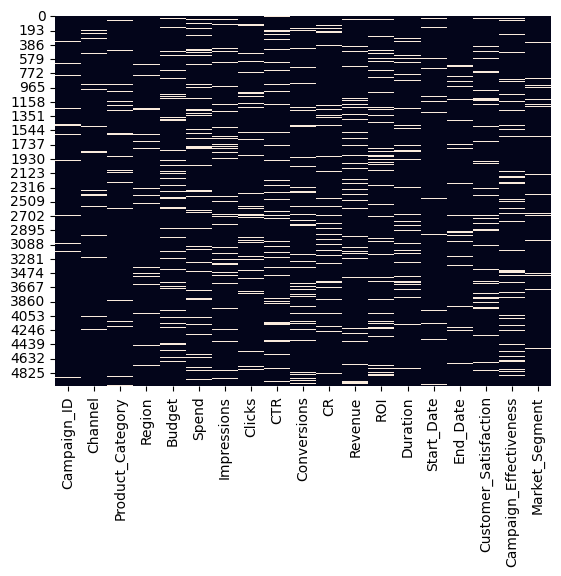

In [9]:
missing_values_count = df_original.isnull().sum()
missing_values_percentage = df_original.isnull().sum() / df_original.shape[0] * 100
grafico1 = sns.heatmap(df_original.isnull(), cbar=False)

missing_values_df = pd.concat([missing_values_count, missing_values_percentage], axis=1)
missing_values_df.columns = ['Missing Values Count', 'Missing Values Percentage']

missing_values_df

- Decide cómo manejar los valores faltantes:
  - **Eliminar filas o columnas** con muchos valores faltantes.
  - **Imputar valores** utilizando métodos como media, mediana o moda.

# - Hacer limpieza columna por columna 



In [10]:
#Campaign_ID: Cambiar los numeros de campaña a que sean subsecuentes
df1['Campaign_ID'] = range(1, len(df1) + 1)

In [11]:
df1.head(2)

Campaign_ID    Channel Product_Category        Region    Budget     Spend  \
0            1  billboard          fashion  kuala lumpur  484341.0  197038.0   
1            2        NaN           health       sarawak  468792.0   33743.0   

   Impressions  Clicks     CTR  Conversions      CR   Revenue   ROI  Duration  \
0     545901.0     NaN  0.0785       7993.0  0.3414  849005.0  0.64     212.0   
1     527513.0  4130.0  0.9479       9459.0     NaN  921078.0  3.78      29.0   

  Start_Date    End_Date  Customer_Satisfaction  Campaign_Effectiveness  \
0   2/3/2023  23/12/2023                    3.0                     3.0   
1        NaN         NaN                    3.0                     7.0   

  Market_Segment  
0         medium  
1         medium

In [12]:
# Channel: Cambiar NaN por 'Unknown'
df1['Channel'] = df1['Channel'].fillna('Unknown')

In [13]:
#Product_Category: Cambiar NaN por 'Unknown'
df1['Product_Category'] = df1['Product_Category'].fillna('Unknown')

In [14]:
#Region: Cambiar NaN por 'Unknown'
df1['Region'] = df1['Region'].fillna('Unknown')

In [15]:
#Budget: Calculo de su Media, de acuerdo a la region para reemplazar los NaN
df1['Budget'] = df1['Budget'].fillna(df1.groupby('Region')['Budget'].transform('mean'))

In [16]:
#Spend: Calculo de su Media, de acuerdo a la region para reemplazar los NaN
df1['Spend'] = df1['Spend'].fillna(df1.groupby('Region')['Spend'].transform('mean'))

Statistics=0.114, p=0.000
La distribución no parece normal (se rechaza H0)


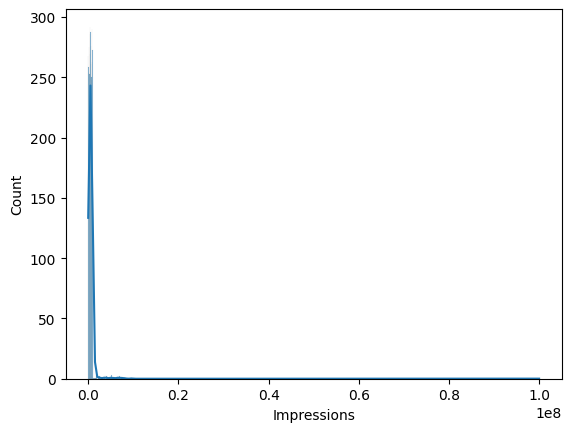

In [17]:
#Impressions: Verificar su distribucion, en caso de ser normal, reemplazar los NaN por la media

from scipy.stats import shapiro

# 1.Visualizar la distribución de 'Impressions'
sns.histplot(df1['Impressions'].dropna(), kde=True)

# 2.Realizar la prueba de normalidad de Shapiro-Wilk
stat, p = shapiro(df1['Impressions'].dropna())
print('Statistics=%.3f, p=%.3f' % (stat, p))

# 3.Interpretar el resultado
alpha = 0.05
if p > alpha:
    print('La distribución parece normal (no se rechaza H0)')
    # Reemplazar los NaN por la media
    df1['Impressions'] = df1['Impressions'].fillna(df1['Impressions'].mean())
else:
    print('La distribución no parece normal (se rechaza H0)')




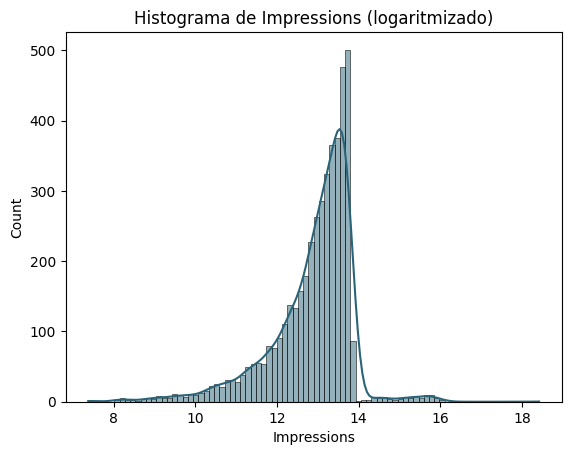

In [18]:
import matplotlib.pyplot as plt

# 1.Transformacion Logaritmica
df1['Impressions'] = np.log1p(df1['Impressions']+1) #Con +1 se evita el log0

# 2. Histograma con KDE de 'Impressions' transformado logaritmicamente
sns.histplot(df1['Impressions'], kde=True, color='#2a6478')
plt.title('Histograma de Impressions (logaritmizado)')
plt.show()


In [19]:
# Imputar valores de Impressions con media
df1['Impressions'] = df1['Impressions'].fillna(df1['Impressions'].mean())


In [20]:
df1.isnull().sum()

Campaign_ID                 0
Channel                     0
Product_Category            0
Region                      0
Budget                      0
Spend                       0
Impressions                 0
Clicks                    486
CTR                       498
Conversions               494
CR                        496
Revenue                   509
ROI                       495
Duration                  479
Start_Date                259
End_Date                  257
Customer_Satisfaction     492
Campaign_Effectiveness    490
Market_Segment            262
dtype: int64

In [21]:
#Hacer una copia de la base de datos
df2=df1.copy()

In [22]:
# CTR: Utilizar metodo KNN para imputar los valores faltantes
from sklearn.impute import KNNImputer

# Crear una instancia del imputador KNN
knn_imputer = KNNImputer(n_neighbors=5)

# Seleccionar la columna 'CTR' para imputar
ctr_values = df2[['CTR']]

# Aplicar el imputador KNN para llenar los valores faltantes
ctr_imputed = knn_imputer.fit_transform(ctr_values)

# Actualizar la columna 'CTR' en el DataFrame original
df2['CTR'] = ctr_imputed

# Verificar los resultados
print(df2['CTR'].isnull().sum())  # Debería ser 0 si todos los valores faltantes fueron imputados

0


In [23]:
df2.isnull().sum()

Campaign_ID                 0
Channel                     0
Product_Category            0
Region                      0
Budget                      0
Spend                       0
Impressions                 0
Clicks                    486
CTR                         0
Conversions               494
CR                        496
Revenue                   509
ROI                       495
Duration                  479
Start_Date                259
End_Date                  257
Customer_Satisfaction     492
Campaign_Effectiveness    490
Market_Segment            262
dtype: int64

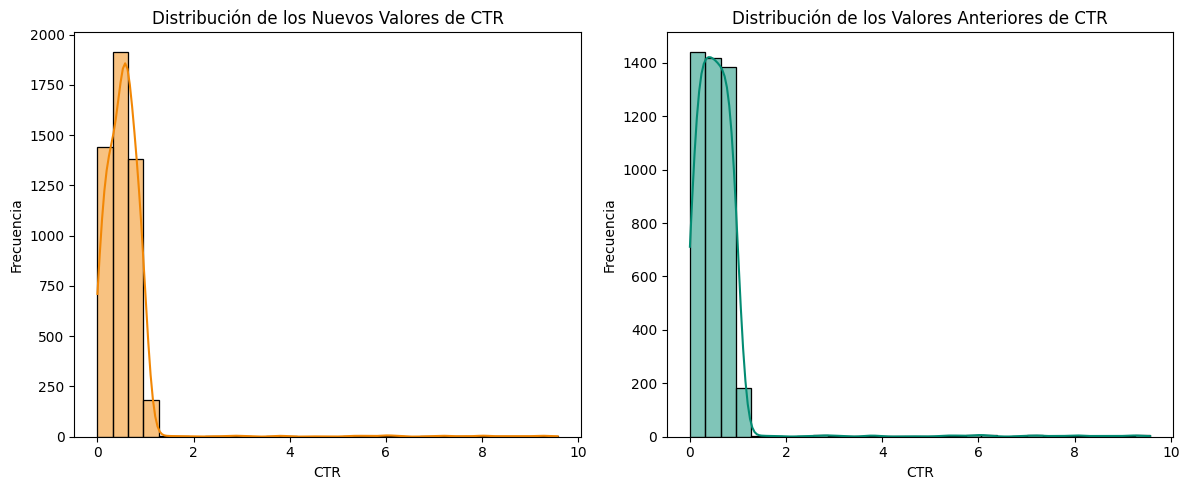

In [24]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Crear un histograma con KDE para los nuevos valores de CTR en ax1
sns.histplot(df2['CTR'], kde=True, color='#F28705', bins=30, ax=ax1)
ax1.set_title('Distribución de los Nuevos Valores de CTR')
ax1.set_xlabel('CTR')
ax1.set_ylabel('Frecuencia')

# Crear un histograma con KDE para los valores anteriores de CTR en ax2
sns.histplot(df1['CTR'], kde=True, color='#038C73', bins=30, ax=ax2)
ax2.set_title('Distribución de los Valores Anteriores de CTR')
ax2.set_xlabel('CTR')
ax2.set_ylabel('Frecuencia')

plt.tight_layout()  # Ajustar para evitar superposición
plt.show()

In [25]:
df2.isnull().sum()

Campaign_ID                 0
Channel                     0
Product_Category            0
Region                      0
Budget                      0
Spend                       0
Impressions                 0
Clicks                    486
CTR                         0
Conversions               494
CR                        496
Revenue                   509
ROI                       495
Duration                  479
Start_Date                259
End_Date                  257
Customer_Satisfaction     492
Campaign_Effectiveness    490
Market_Segment            262
dtype: int64

In [26]:
#Conversions: Imputar los valores con la media
df2['Conversions'] = df2['Conversions'].fillna(df2['Conversions'].mean())


In [27]:
# CR: Imputar los valores con la media
df2['CR'] = df2['CR'].fillna(df2['CR'].mean())

In [28]:
#Revenue: Imputar los valores con la media
df2['Revenue'] = df2['Revenue'].fillna(df2['Revenue'].mean())

In [29]:
df2.isnull().sum()

Campaign_ID                 0
Channel                     0
Product_Category            0
Region                      0
Budget                      0
Spend                       0
Impressions                 0
Clicks                    486
CTR                         0
Conversions                 0
CR                          0
Revenue                     0
ROI                       495
Duration                  479
Start_Date                259
End_Date                  257
Customer_Satisfaction     492
Campaign_Effectiveness    490
Market_Segment            262
dtype: int64

In [30]:
#ROI: Metodo KNN para imputar valores faltantes
# ROI: Utilizar metodo KNN para imputar los valores faltantes

from sklearn.impute import KNNImputer

# Crear una instancia del imputador KNN
knn_imputer = KNNImputer(n_neighbors=5)

# Seleccionar la columna 'CTR' para imputar
ctr_values = df2[['ROI']]

# Aplicar el imputador KNN para llenar los valores faltantes
ctr_imputed = knn_imputer.fit_transform(ctr_values)

# Actualizar la columna 'CTR' en el DataFrame original
df2['ROI'] = ctr_imputed

# Verificar los resultados
print(df2['ROI'].isnull().sum())


0


In [31]:
#Duration: Mediana
df2['Duration'] = df2['Duration'].fillna(df2['Duration'].median())

In [32]:
#Start_Date: Cambiar NaN por 'Unknown'
df2['Start_Date'] = df2['Start_Date'].fillna('Unknown')

In [33]:
#End_Date: Cambiar NaN por 'Unknown'
df2['End_Date'] = df2['End_Date'].fillna('Unknown')

In [34]:
#Generar nueva columa de duracion?

In [35]:
#Customer_Satisfaction: Cambiar NaN por 'Not Rated'
df2['Customer_Satisfaction'] = df2['Customer_Satisfaction'].fillna('Not Rated')

In [36]:
#Clicks: Imputar los valores con la media
df2['Clicks'] = df2['Clicks'].fillna(df2['Clicks'].mean())

In [37]:
#Campaign_Effectiveness: Cambiar NaN por 'Not Rated'
df2['Campaign_Effectiveness'] = df2['Campaign_Effectiveness'].fillna('Not Rated')

In [38]:
#Market_Segment: Cambiar NaN por 'Unknown'
df2['Market_Segment'] = df2['Market_Segment'].fillna('Unknown')

In [39]:
df2.isnull().sum()  

Campaign_ID               0
Channel                   0
Product_Category          0
Region                    0
Budget                    0
Spend                     0
Impressions               0
Clicks                    0
CTR                       0
Conversions               0
CR                        0
Revenue                   0
ROI                       0
Duration                  0
Start_Date                0
End_Date                  0
Customer_Satisfaction     0
Campaign_Effectiveness    0
Market_Segment            0
dtype: int64

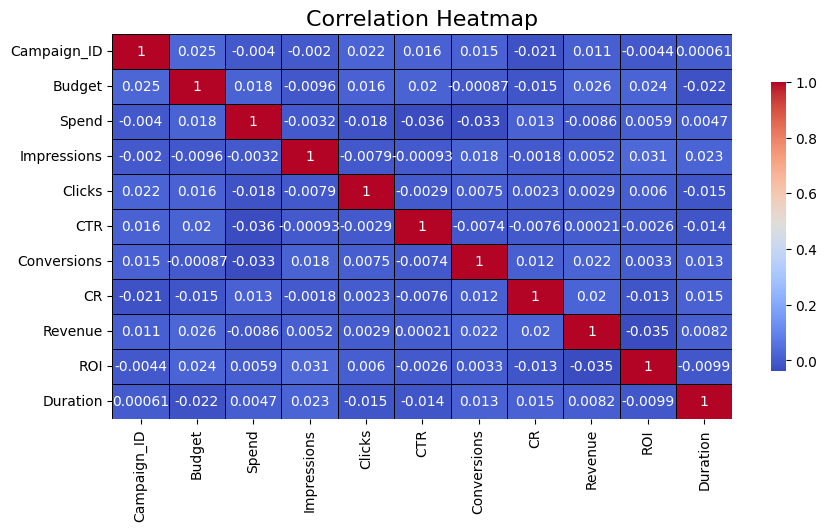

In [40]:
plt.figure(figsize=(10, 5))
sns.heatmap(df2.corr('spearman', numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black', cbar_kws={'shrink': 0.75})
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

#### 4.2 Manejo de Outliers

- Utiliza gráficos de caja (boxplots) para identificar outliers en variables numéricas.
- Decide cómo manejar los outliers:
  - **Mantenerlos** si son relevantes.
  - **Eliminarlos** si son errores.
  - **Transformarlos** utilizando métodos como logaritmos.

In [41]:
df2['Campaign_ID'] = df2['Campaign_ID'].astype('object')

In [42]:
#Separar variables numericas y categoricas
num_vars = df2.select_dtypes(include=['float64', 'int64']).columns
cat_vars = df2.select_dtypes(include=['object']).columns

resultados = pd.DataFrame({
    "Variables Numéricas": list(num_vars),
    "Variables Categóricas": list(cat_vars) + [""] * (len(num_vars) - len(cat_vars))  # Ajuste para que ambas columnas tengan el mismo tamaño
})



In [43]:
resultados

Variables Numéricas   Variables Categóricas
0              Budget             Campaign_ID
1               Spend                 Channel
2         Impressions        Product_Category
3              Clicks                  Region
4                 CTR              Start_Date
5         Conversions                End_Date
6                  CR   Customer_Satisfaction
7             Revenue  Campaign_Effectiveness
8                 ROI          Market_Segment
9            Duration

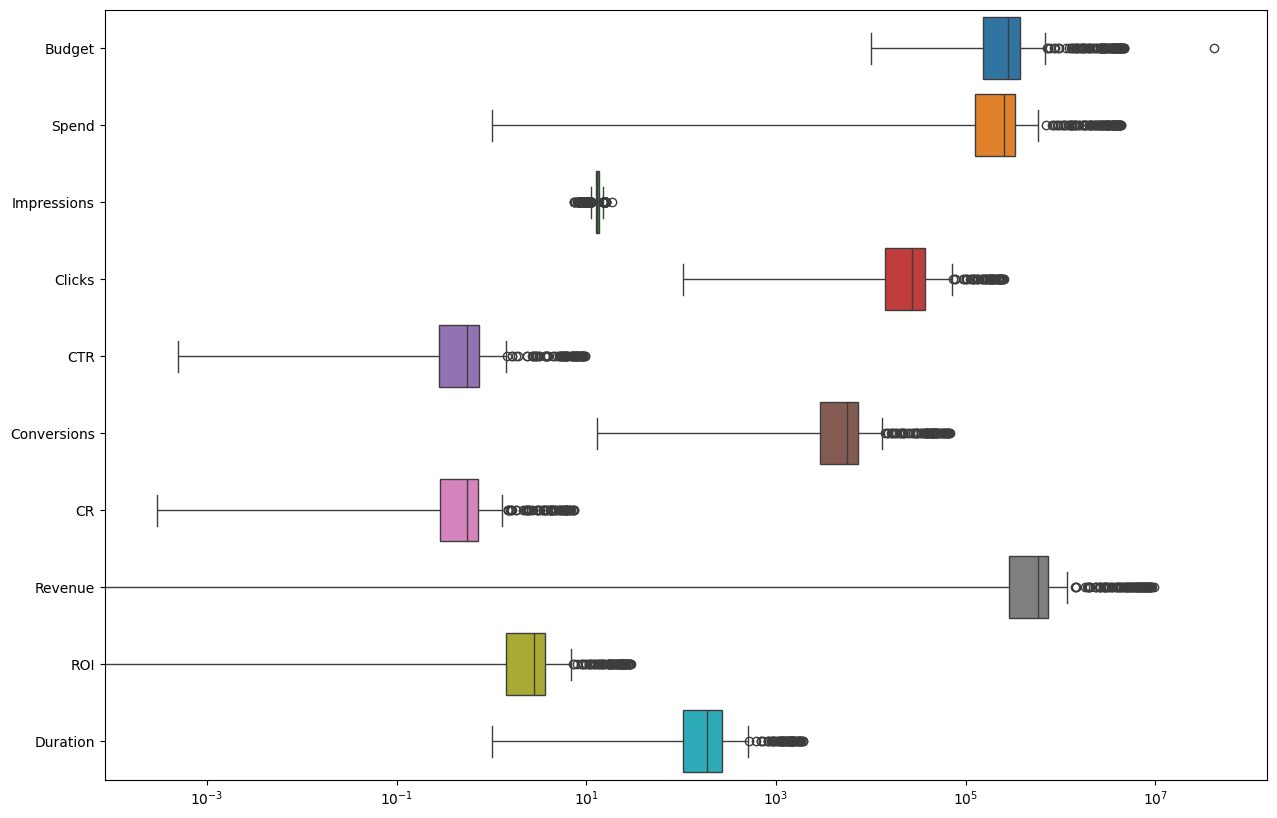

In [44]:
# Outliers = valores atípicos que podrian afectar el análisis
# Gráfica de caja para identificar outliers
plt.figure(figsize=(15,10))
sns.boxplot(data=df2[num_vars], vert=False, orient='h')

# ajustar el eje x para que se vea mejor la gráfica
plt.xscale('log')
plt.show()

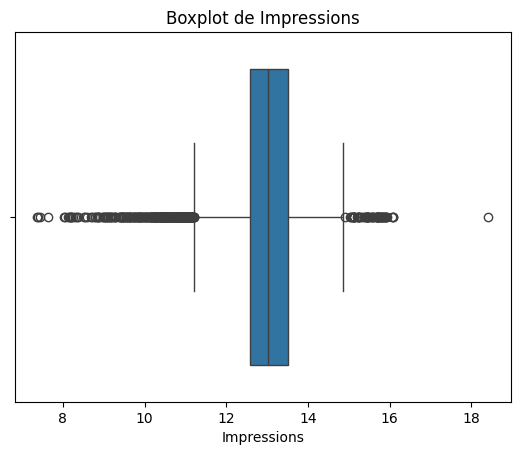

Número de outliers: 370


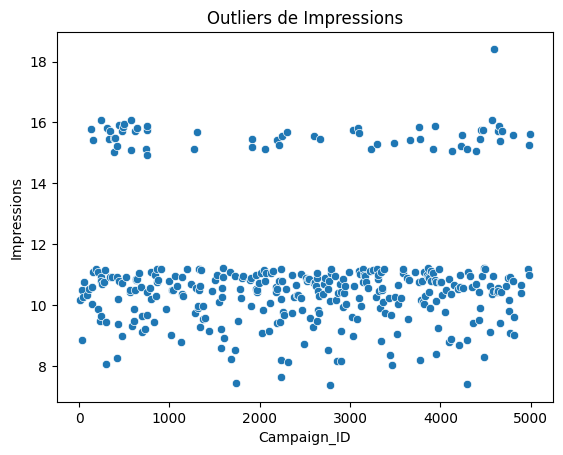

In [45]:
# Visualización de la distribución de los datos
sns.boxplot(x=df2['Impressions'])
plt.title('Boxplot de Impressions')
plt.show()

# Identificación de outliers usando el método IQR
Q1 = df2['Impressions'].quantile(0.25)
Q3 = df2['Impressions'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = df2[(df2['Impressions'] < lower_bound) | (df2['Impressions'] > upper_bound)]
print(f'Número de outliers: {len(outliers)}')

# Visualización de los outliers
sns.scatterplot(data=outliers, x='Campaign_ID', y='Impressions')
plt.title('Outliers de Impressions')
plt.show()

# Análisis de la representatividad de los outliers
# Puedes realizar análisis adicionales aquí, como comparar estadísticas descriptivas
# entre los datos con y sin outliers, o realizar pruebas estadísticas adicionales.

In [46]:
#Se decide conservar los outliers transformandolos con el metodo de transformacion logaritmica para reducir el sesgo.
#Esto permite que los valores atípicos tengan menos impacto en análisis estadísticos o visualizaciones, sin perder datos valiosos que podrían ser útiles en el análisis.

df2['Impressions2'] = np.log1p(df2['Impressions'])  # log(x + 1) para evitar log(0)

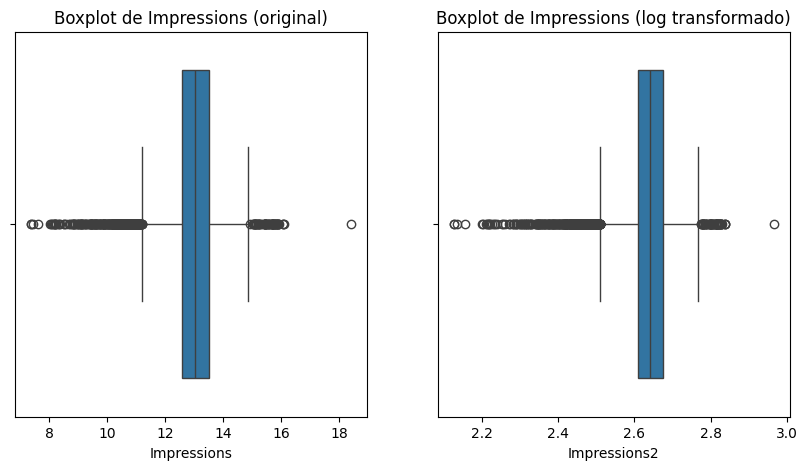

In [47]:
plt.figure(figsize=(10, 5))

# Boxplot antes de la transformación
plt.subplot(1, 2, 1)
sns.boxplot(x=df2['Impressions'])
plt.title('Boxplot de Impressions (original)')

# Boxplot después de la transformación
plt.subplot(1, 2, 2)
sns.boxplot(x=df2['Impressions2'])
plt.title('Boxplot de Impressions (log transformado)')

plt.show()

In [48]:
def eliminar_outliers_percentil(df, columna, lower_percentile=0.01, upper_percentile=0.99):
# Elimina los valores extremos de una columna específica de un DataFrame utilizando un rango de percentiles. lower_percentile : Percentil inferior para cortar los valores atípicos (por defecto, 0.01) upper_percentile : Percentil superior  (por defecto, 0.99)
# Calcular los valores de corte en los percentiles especificados
    lower_limit = df[columna].quantile(lower_percentile)
    upper_limit = df[columna].quantile(upper_percentile)
    
# Filtrar los valores que están dentro del rango de percentiles
    df_filtrado = df[(df[columna] >= lower_limit) & (df[columna] <= upper_limit)]
    return df_filtrado
# Eliminar los outliers extremos en la columna 'Impressions' usando el rango de percentiles
Impressions2 = eliminar_outliers_percentil(df2, 'Impressions', lower_percentile=0.01, upper_percentile=0.99)

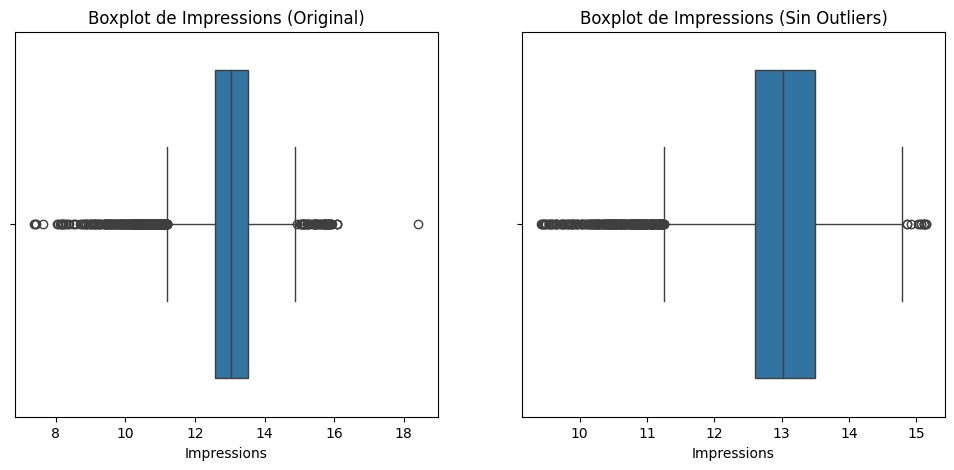

In [49]:
plt.figure(figsize=(12, 5))

# Boxplot de los datos originales
plt.subplot(1, 2, 1)
sns.boxplot(x=df2['Impressions'])
plt.title('Boxplot de Impressions (Original)')

# Boxplot de los datos sin outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=Impressions2['Impressions'])
plt.title('Boxplot de Impressions (Sin Outliers)')

plt.show()

In [50]:
print("Tamaño original del DataFrame:", df2.shape)
print("Tamaño después de eliminar outliers de Impressions:", Impressions2.shape)

Tamaño original del DataFrame: (5000, 20)
Tamaño después de eliminar outliers de Impressions: (4900, 20)


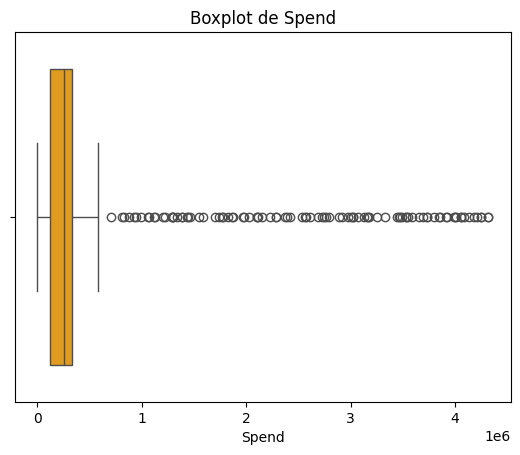

Número de outliers: 97


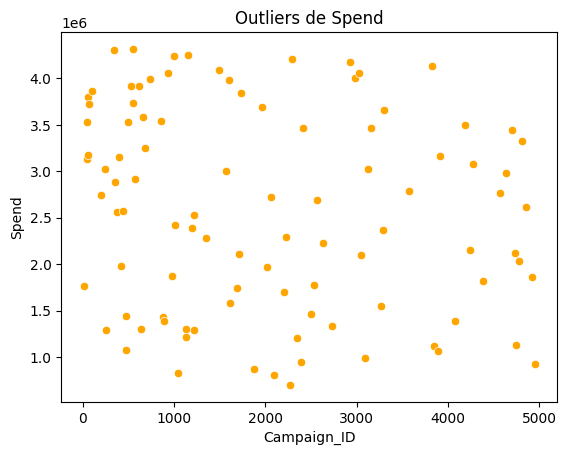

In [51]:
# Visualización de la distribución de los datos
sns.boxplot(x=df2['Spend'],color='orange')
plt.title('Boxplot de Spend')
plt.show()

# Identificación de outliers usando el método IQR
Q1 = df2['Spend'].quantile(0.25)
Q3 = df2['Spend'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = df2[(df2['Spend'] < lower_bound) | (df2['Spend'] > upper_bound)]
print(f'Número de outliers: {len(outliers)}')

# Visualización de los outliers
sns.scatterplot(data=outliers, x='Campaign_ID', y='Spend',color='orange')
plt.title('Outliers de Spend')
plt.show()

# Análisis de la representatividad de los outliers
# Puedes realizar análisis adicionales aquí, como comparar estadísticas descriptivas
# entre los datos con y sin outliers, o realizar pruebas estadísticas adicionales.

In [52]:
#Transformacion logaritmica
df2['Spend2'] = np.log1p(df2['Spend'])  # log(x + 1) para evitar log(0)

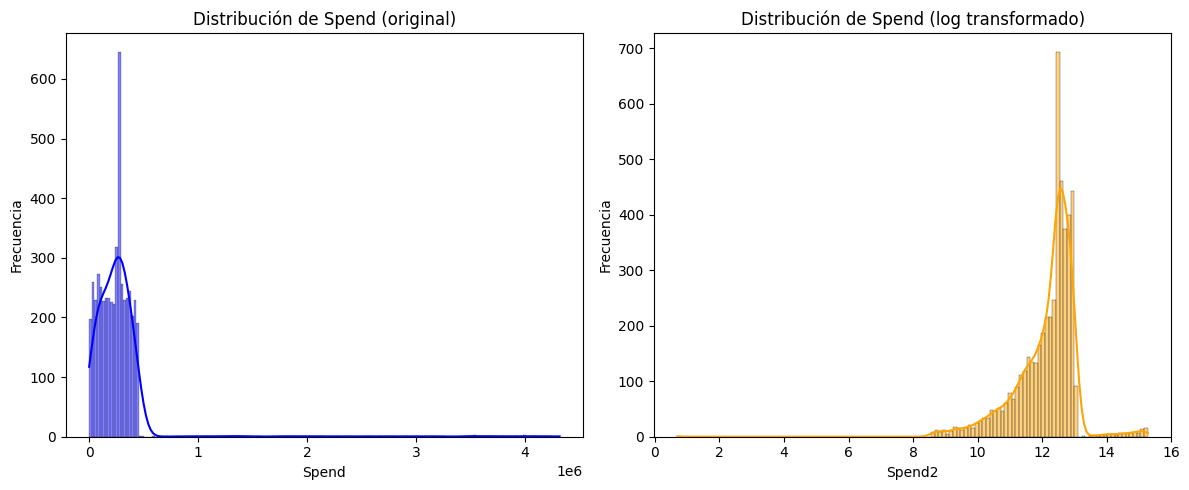

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una figura con dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de la distribución original de 'Spend'
sns.histplot(df2['Spend'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribución de Spend (original)')
axes[0].set_xlabel('Spend')
axes[0].set_ylabel('Frecuencia')

# Gráfico de la distribución transformada logarítmicamente de 'Spend'
sns.histplot(df2['Spend2'], kde=True, ax=axes[1], color='orange')
axes[1].set_title('Distribución de Spend (log transformado)')
axes[1].set_xlabel('Spend2')
axes[1].set_ylabel('Frecuencia')

# Mostrar los gráficos
plt.tight_layout()
plt.show()



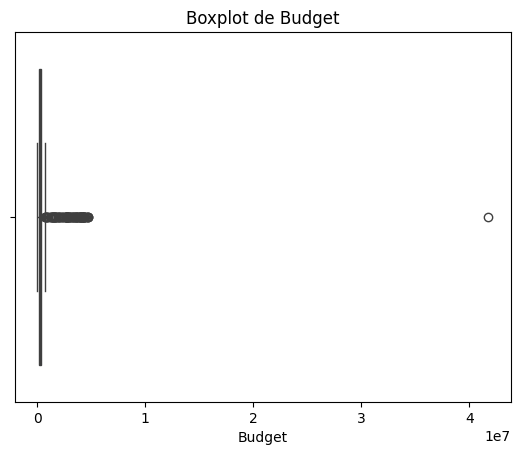

Número de outliers: 98


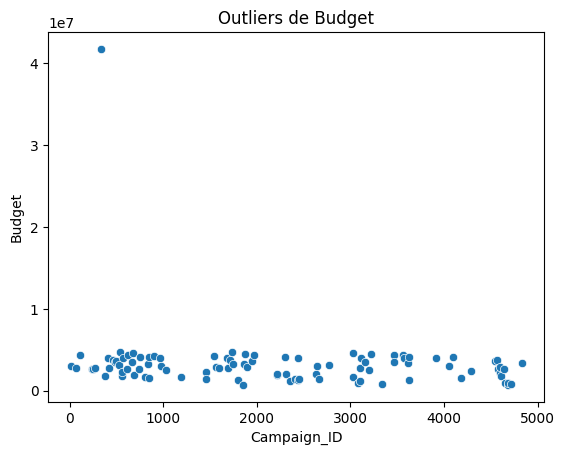

In [54]:
# Visualización de la distribución de los datos
sns.boxplot(x=df2['Budget'])
plt.title('Boxplot de Budget')
plt.show()

# Identificación de outliers usando el método IQR
Q1 = df2['Budget'].quantile(0.25)
Q3 = df2['Budget'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = df2[(df2['Budget'] < lower_bound) | (df2['Budget'] > upper_bound)]
print(f'Número de outliers: {len(outliers)}')

# Visualización de los outliers
sns.scatterplot(data=outliers, x='Campaign_ID', y='Budget')
plt.title('Outliers de Budget')
plt.show()

In [55]:
#Winsorización:Si prefieres mantener todos los datos sin excluir ningún valor. Esto mantendrá el valor pero lo reducirá a un nivel más representativo.
# Capar los valores de Budget al percentil 99
upper_limit = df2['Budget'].quantile(0.99)
df2['Budget2'] = np.where(df2['Budget'] > upper_limit, upper_limit, df2['Budget'])

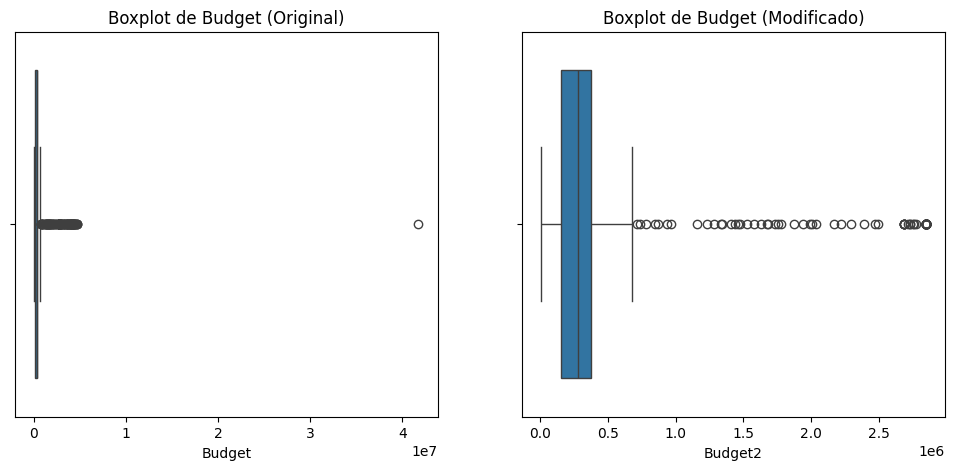

In [56]:

plt.figure(figsize=(12, 5))

# Boxplot antes de la modificación
plt.subplot(1, 2, 1)
sns.boxplot(x=df2['Budget'])
plt.title('Boxplot de Budget (Original)')

# Boxplot después de la modificación (usando Budget modificado)
plt.subplot(1, 2, 2)
sns.boxplot(x=df2['Budget2'])  # Usa 'Budget_capped' o 'Budget_log', según el método aplicado
plt.title('Boxplot de Budget (Modificado)')

plt.show()


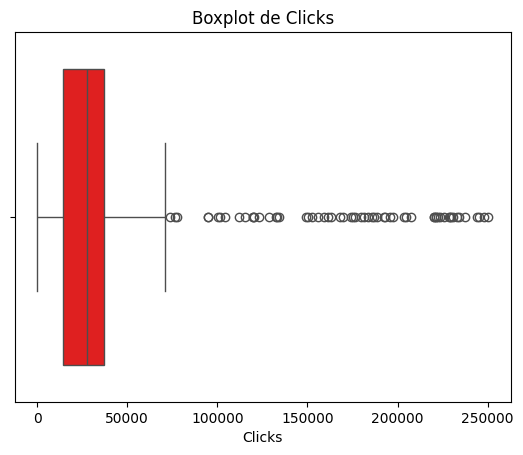

Número de outliers: 61


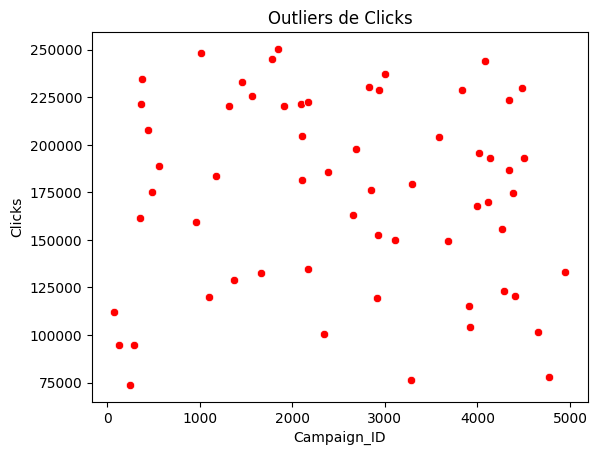

In [57]:
# Visualización de la distribución de los datos
sns.boxplot(x=df2['Clicks'],color='red')
plt.title('Boxplot de Clicks')
plt.show()

# Identificación de outliers usando el método IQR
Q1 = df2['Clicks'].quantile(0.25)
Q3 = df2['Clicks'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = df2[(df2['Clicks'] < lower_bound) | (df2['Clicks'] > upper_bound)]
print(f'Número de outliers: {len(outliers)}')

# Visualización de los outliers
sns.scatterplot(data=outliers, x='Campaign_ID', y='Clicks',color='red')
plt.title('Outliers de Clicks')
plt.show()

In [58]:
#Transformacion logaritmica
df2['Clicks2'] = np.log1p(df2['Clicks'])  # log(x + 1) para evitar problemas con log(0)

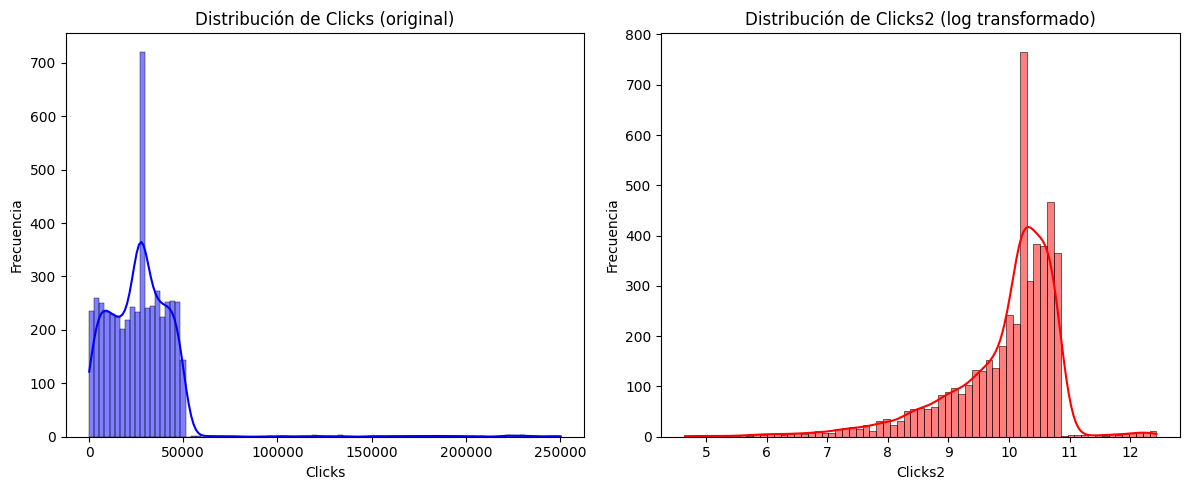

In [59]:
# Crear una figura con dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de la distribución original de 'Spend'
sns.histplot(df2['Clicks'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribución de Clicks (original)')
axes[0].set_xlabel('Clicks')
axes[0].set_ylabel('Frecuencia')

# Gráfico de la distribución transformada logarítmicamente de 'Spend'
sns.histplot(df2['Clicks2'], kde=True, ax=axes[1], color='red')
axes[1].set_title('Distribución de Clicks2 (log transformado)')
axes[1].set_xlabel('Clicks2')
axes[1].set_ylabel('Frecuencia')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

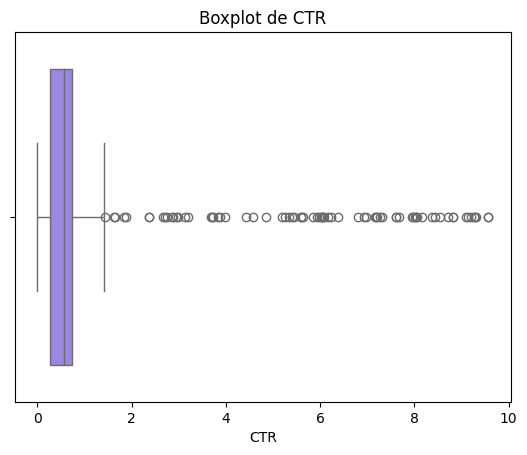

Número de outliers: 74


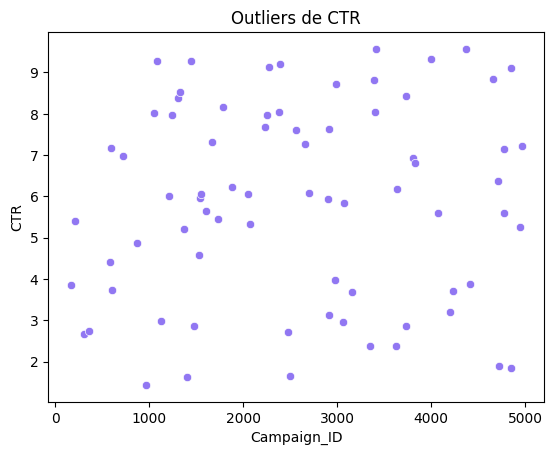

In [60]:
# Visualización de la distribución de los datos
sns.boxplot(x=df2['CTR'],color='#9177F2')
plt.title('Boxplot de CTR')
plt.show()

# Identificación de outliers usando el método IQR
Q1 = df2['CTR'].quantile(0.25)
Q3 = df2['CTR'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = df2[(df2['CTR'] < lower_bound) | (df2['CTR'] > upper_bound)]
print(f'Número de outliers: {len(outliers)}')

# Visualización de los outliers
sns.scatterplot(data=outliers, x='Campaign_ID', y='CTR',color='#9177F2')
plt.title('Outliers de CTR')
plt.show()

In [61]:
#Winsorizacion de valores atipicos en CTR
upper_limit = df2['CTR'].quantile(0.95)
df2['CTR2'] = np.where(df2['CTR'] > upper_limit, upper_limit, df2['CTR'])

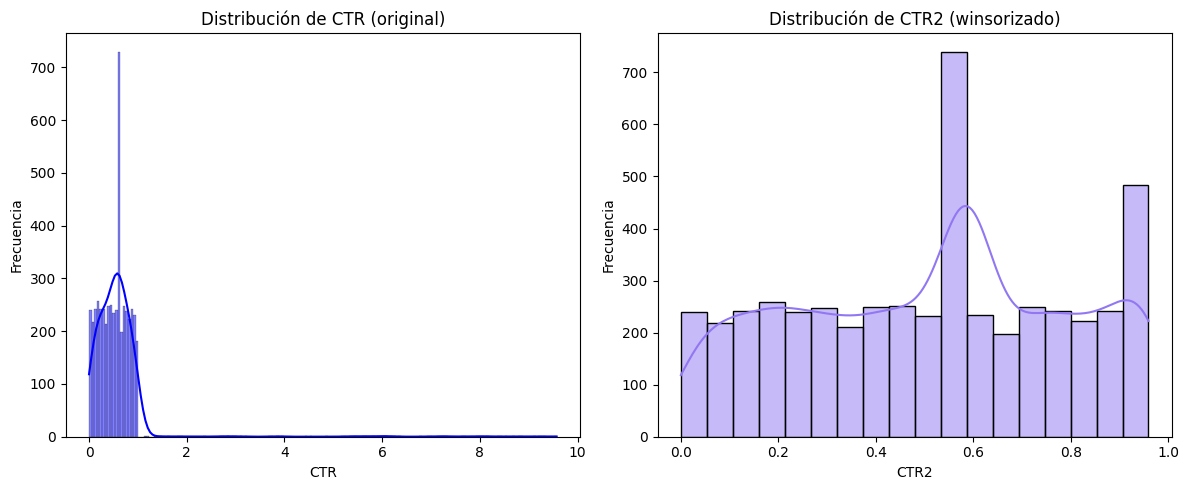

In [62]:
# Crear una figura con dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de la distribución original de 'Spend'
sns.histplot(df2['CTR'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribución de CTR (original)')
axes[0].set_xlabel('CTR')
axes[0].set_ylabel('Frecuencia')

# Gráfico de la distribución transformada logarítmicamente de 'Spend'
sns.histplot(df2['CTR2'], kde=True, ax=axes[1], color='#9177F2')
axes[1].set_title('Distribución de CTR2 (winsorizado)')
axes[1].set_xlabel('CTR2')
axes[1].set_ylabel('Frecuencia')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

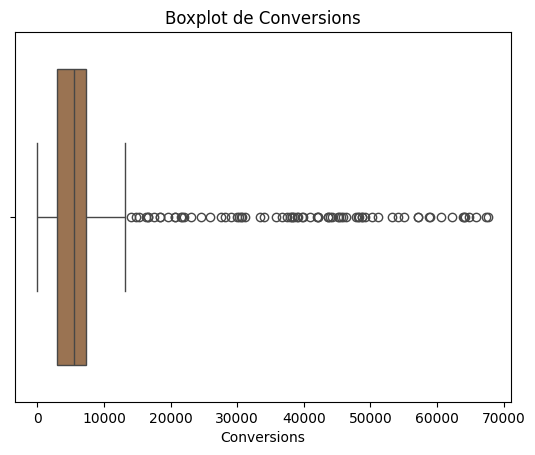

Número de outliers: 76


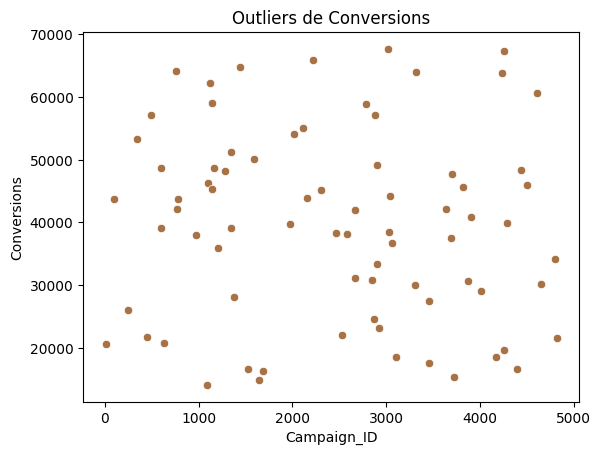

In [63]:
# Visualización de la distribución de los datos
sns.boxplot(x=df2['Conversions'],color='#A67246')
plt.title('Boxplot de Conversions')
plt.show()

# Identificación de outliers usando el método IQR
Q1 = df2['Conversions'].quantile(0.25)
Q3 = df2['Conversions'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = df2[(df2['Conversions'] < lower_bound) | (df2['Conversions'] > upper_bound)]
print(f'Número de outliers: {len(outliers)}')

# Visualización de los outliers
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(6))
sns.scatterplot(data=outliers, x='Campaign_ID', y='Conversions',color='#A67246')
plt.title('Outliers de Conversions')
plt.show()

In [64]:
#Transformacion logaritmica
df2['Conversions2'] = np.log1p(df2['Conversions'])  # log(x + 1) para evitar log(0)

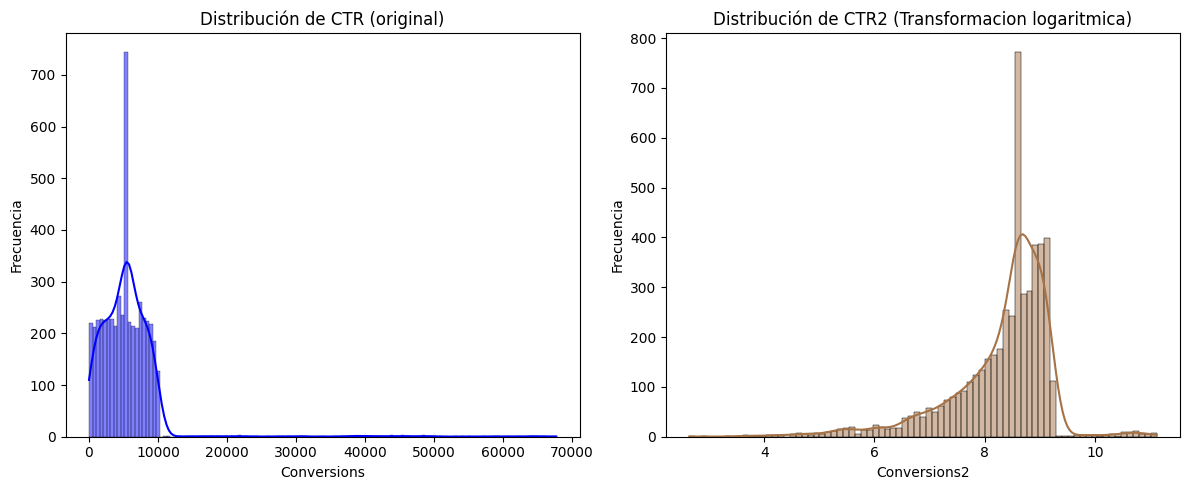

In [65]:
# Crear una figura con dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de la distribución original de 'Spend'
sns.histplot(df2['Conversions'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribución de CTR (original)')
axes[0].set_xlabel('Conversions')
axes[0].set_ylabel('Frecuencia')

# Gráfico de la distribución transformada logarítmicamente de 'Spend'
sns.histplot(df2['Conversions2'], kde=True, ax=axes[1], color='#A67246')
axes[1].set_title('Distribución de CTR2 (Transformacion logaritmica)')
axes[1].set_xlabel('Conversions2')
axes[1].set_ylabel('Frecuencia')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

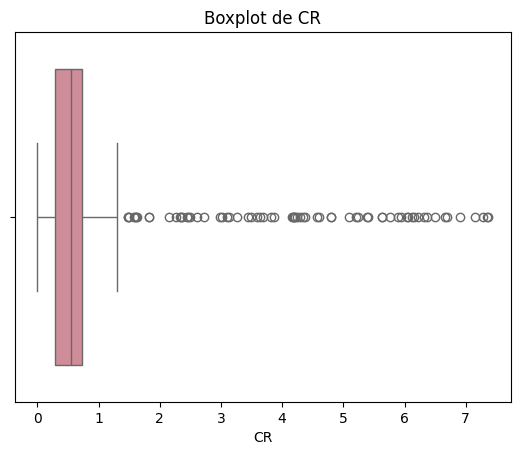

Número de outliers: 69


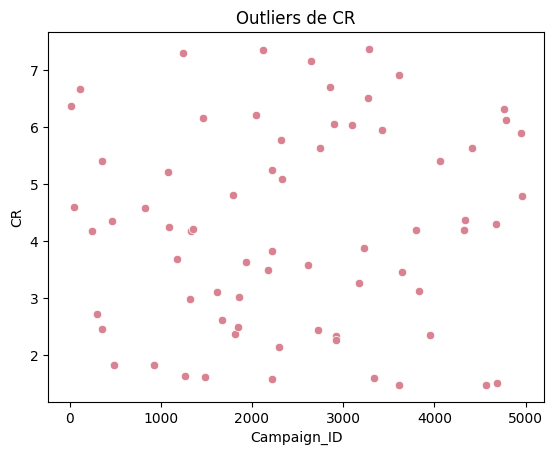

In [66]:
# Visualización de la distribución de los datos
sns.boxplot(x=df2['CR'],color='#D98292')
plt.title('Boxplot de CR')
plt.show()

# Identificación de outliers usando el método IQR
Q1 = df2['CR'].quantile(0.25)
Q3 = df2['CR'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = df2[(df2['CR'] < lower_bound) | (df2['CR'] > upper_bound)]
print(f'Número de outliers: {len(outliers)}')

# Visualización de los outliers
sns.scatterplot(data=outliers, x='Campaign_ID', y='CR',color='#D98292')
plt.title('Outliers de CR')
plt.show()

In [67]:
#Transformacion logaritmica
df2['CR2'] = np.log1p(df2['CR'])  # log(x + 1) para evitar log(0)

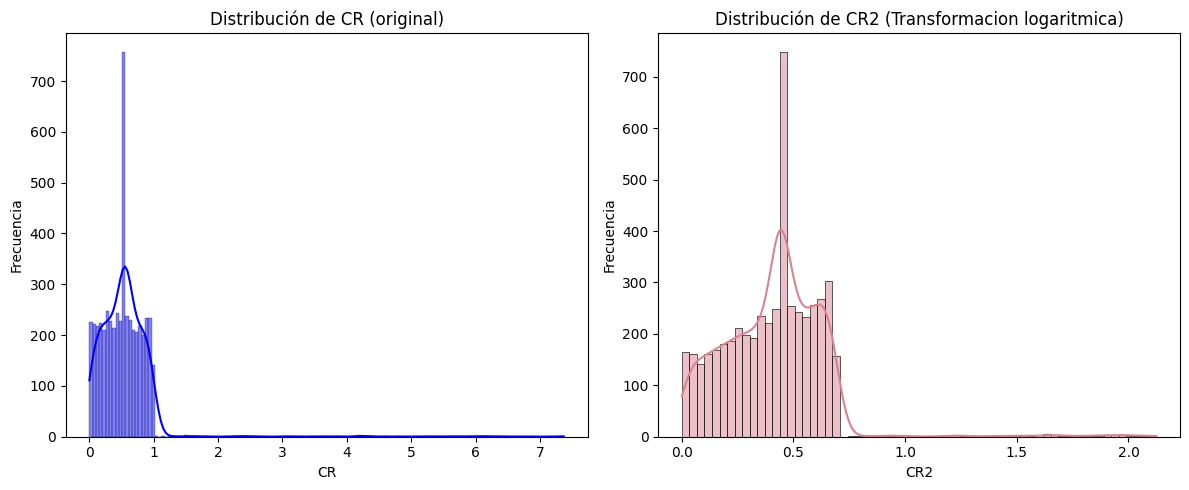

In [68]:
# Crear una figura con dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de la distribución original de 'Spend'
sns.histplot(df2['CR'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribución de CR (original)')
axes[0].set_xlabel('CR')
axes[0].set_ylabel('Frecuencia')

# Gráfico de la distribución transformada logarítmicamente de 'Spend'
sns.histplot(df2['CR2'], kde=True, ax=axes[1], color='#D98292')
axes[1].set_title('Distribución de CR2 (Transformacion logaritmica)')
axes[1].set_xlabel('CR2')
axes[1].set_ylabel('Frecuencia')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

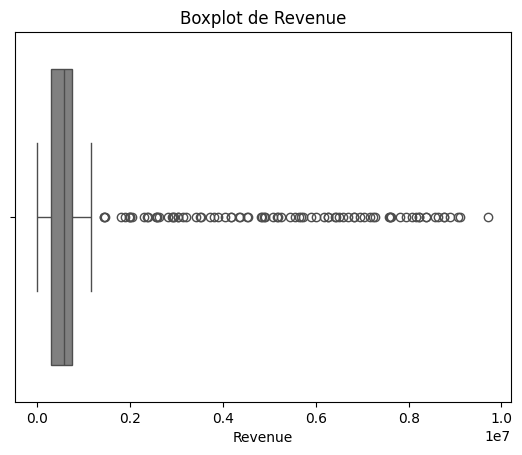

Número de outliers: 87


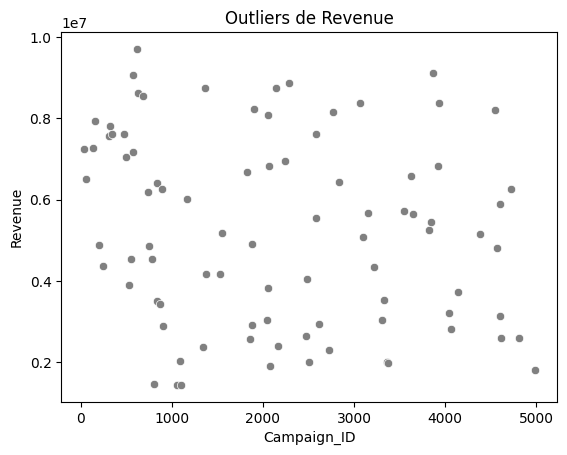

In [69]:
# Visualización de la distribución de los datos
sns.boxplot(x=df2['Revenue'],color='grey')
plt.title('Boxplot de Revenue')
plt.show()

# Identificación de outliers usando el método IQR
Q1 = df2['Revenue'].quantile(0.25)
Q3 = df2['Revenue'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = df2[(df2['Revenue'] < lower_bound) | (df2['Revenue'] > upper_bound)]
print(f'Número de outliers: {len(outliers)}')

# Visualización de los outliers
sns.scatterplot(data=outliers, x='Campaign_ID', y='Revenue',color='grey')
plt.title('Outliers de Revenue')
plt.show()

In [70]:
#Transformacion logaritmica
df2['Revenue2'] = np.log1p(df2['Revenue'])  # log(x + 1) para evitar log(0)

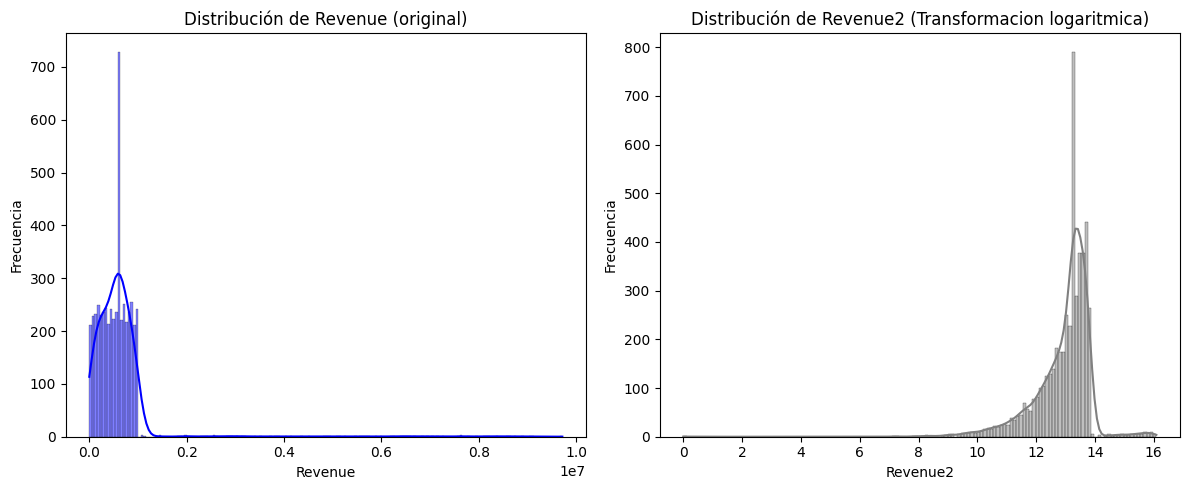

In [71]:
# Crear una figura con dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de la distribución original de 'Spend'
sns.histplot(df2['Revenue'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribución de Revenue (original)')
axes[0].set_xlabel('Revenue')
axes[0].set_ylabel('Frecuencia')

# Gráfico de la distribución transformada logarítmicamente de 'Spend'
sns.histplot(df2['Revenue2'], kde=True, ax=axes[1], color='grey')
axes[1].set_title('Distribución de Revenue2 (Transformacion logaritmica)')
axes[1].set_xlabel('Revenue2')
axes[1].set_ylabel('Frecuencia')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

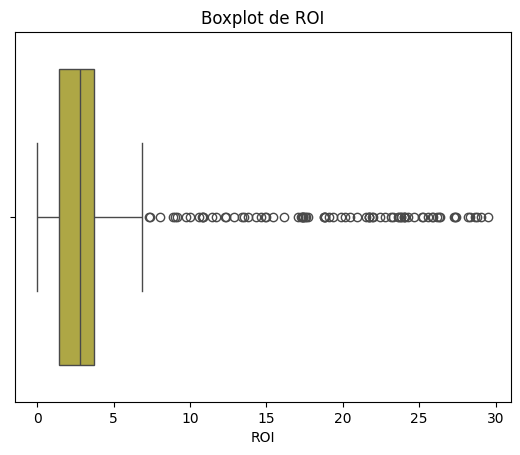

Número de outliers: 81


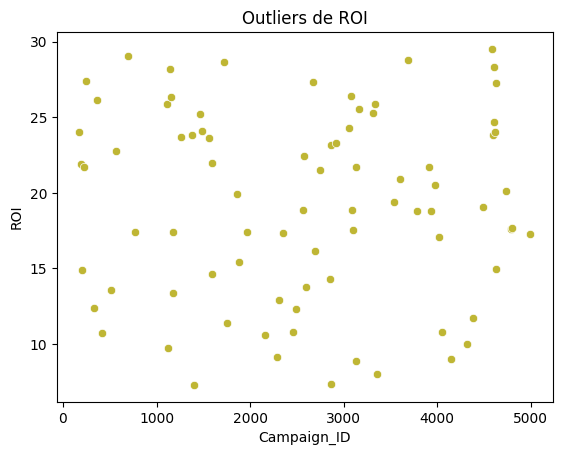

In [72]:
# Visualización de la distribución de los datos
sns.boxplot(x=df2['ROI'],color='#BFB634')
plt.title('Boxplot de ROI')
plt.show()

# Identificación de outliers usando el método IQR
Q1 = df2['ROI'].quantile(0.25)
Q3 = df2['ROI'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = df2[(df2['ROI'] < lower_bound) | (df2['ROI'] > upper_bound)]
print(f'Número de outliers: {len(outliers)}')

# Visualización de los outliers
sns.scatterplot(data=outliers, x='Campaign_ID', y='ROI',color='#BFB634')
plt.title('Outliers de ROI')
plt.show()

In [73]:
#Transformacion logaritmica
df2['ROI2'] = np.log1p(df2['ROI'])  # log(x + 1) para evitar log(0)

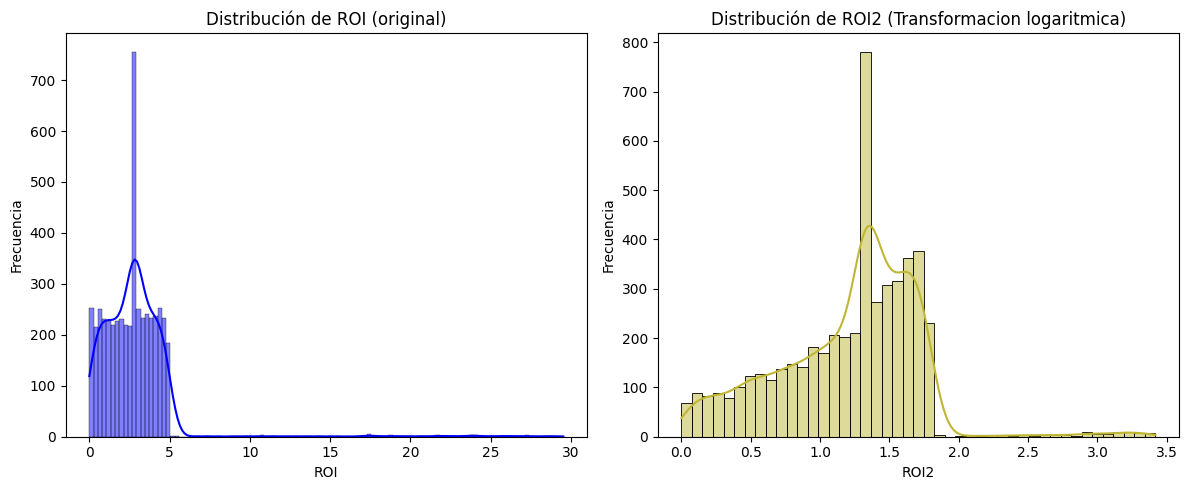

In [74]:
# Crear una figura con dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de la distribución original de 'Spend'
sns.histplot(df2['ROI'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribución de ROI (original)')
axes[0].set_xlabel('ROI')
axes[0].set_ylabel('Frecuencia')

# Gráfico de la distribución transformada logarítmicamente de 'Spend'
sns.histplot(df2['ROI2'], kde=True, ax=axes[1], color='#BFB634')
axes[1].set_title('Distribución de ROI2 (Transformacion logaritmica)')
axes[1].set_xlabel('ROI2')
axes[1].set_ylabel('Frecuencia')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

#### 4.3 Corrección de Inconsistencias

- Verifica y corrige inconsistencias en datos categóricos (e.g., mayúsculas/minúsculas, espacios en blanco).

In [75]:
#Revisar valores únicos y buscar inconsistencias sin las fechas
cat_vars_filtered = cat_vars.drop(['Start_Date', 'End_Date'])
for columna in cat_vars_filtered:
    print(f"Valores únicos en '{columna}':")
    print(df2[columna].unique(), "\n")

Valores únicos en 'Campaign_ID':
[1 2 3 ... 4998 4999 5000] 

Valores únicos en 'Channel':
['billboard' 'Unknown' 'radio' 'email' 'tv' 'social media' 'news'] 

Valores únicos en 'Product_Category':
['fashion' 'health' 'electronics' 'automotive' 'groceries' 'Unknown'] 

Valores únicos en 'Region':
['kuala lumpur' 'sarawak' 'penang' 'Unknown' 'johor' 'sabah' 'malacca'] 

Valores únicos en 'Customer_Satisfaction':
[3.0 1.0 5.0 4.0 'Not Rated' 2.0 9.211087736 18.42217547 27.63326321
 36.84435094 46.05543868] 

Valores únicos en 'Campaign_Effectiveness':
[3.0 7.0 2.0 6.0 44.45747469 10.0 9.0 8.0 4.0 1.0 'Not Rated' 5.0
 8.891494937 62.24046456 53.34896962 71.1319595 80.02345444 35.56597975
 17.78298987 88.91494937 26.67448481] 

Valores únicos en 'Market_Segment':
['medium' 'high' 'low' 'Unknown'] 



In [76]:
#Eliminar espacios en blanco
for columna in cat_vars_filtered:
    df2[columna] = df2[columna].astype(str).str.strip()

### 5. Análisis Exploratorio de Datos (EDA)

#### 5.1 Análisis Univariado

- Analiza la distribución de variables numéricas.
  - Crea histogramas y gráficos KDE.
- Analiza la frecuencia de variables categóricas.
  - Crea gráficos de barras.

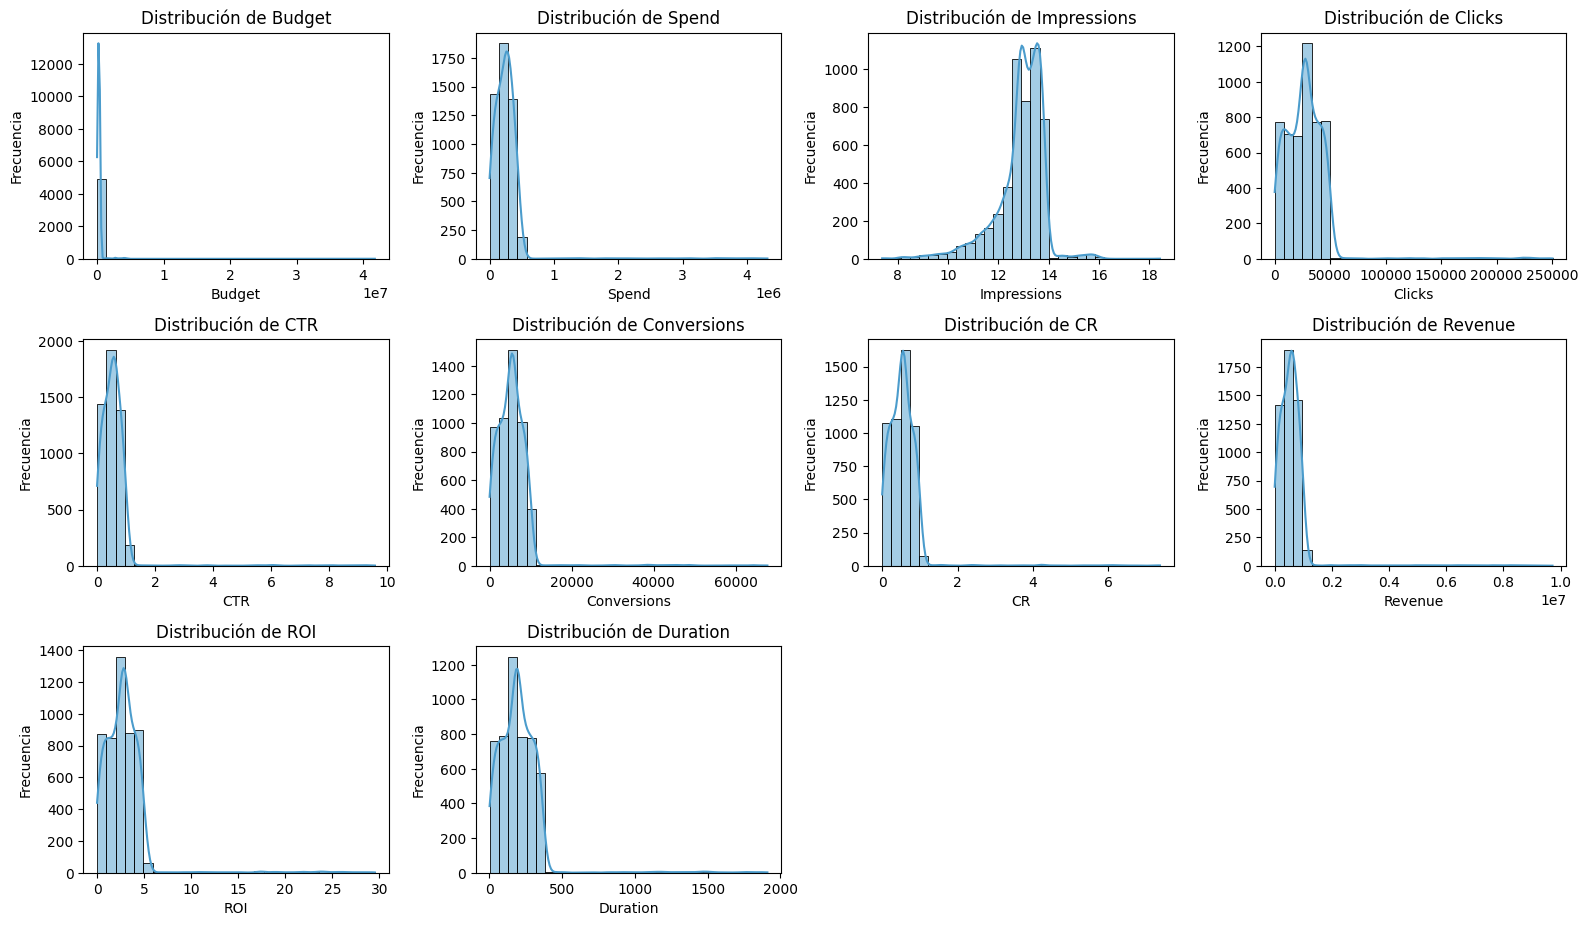

In [77]:
# Crear Histogramas y gráficos de KDE para las variables numéricas en bucle
# Establecer el tamaño de la figura para todos los gráficos
plt.figure(figsize=(16, 12))

# Iterar sobre cada columna numérica y generar los gráficos
for i, col in enumerate(num_vars, 1):
    plt.subplot(4, 4, i)  # Crear una cuadrícula de subplots, ajusta 4x4 según el número de variables
    sns.histplot(df2[col], kde=True, bins=30, color='#4B9CCC')  # Histogramas con KDE superpuesto
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

# Ajustar el diseño para que no haya solapamiento
plt.tight_layout()
plt.show()


In [78]:
# Winsorización al percentil 95 para todas las variables log-transformadas
for col in ['Budget2', 'Spend2', 'Impressions2', 'Clicks2', 'Revenue2', 'Conversions2']:
    upper_limit = df2[col].quantile(0.95)
    df2[f'{col}_capped'] = np.where(df2[col] > upper_limit, upper_limit, df2[col])

# Eliminación de outliers al percentil 1% y 99% para todas las variables log-transformadas
df3 = df2.copy()
for col in ['Budget2', 'Spend2', 'Impressions2', 'Clicks2', 'Revenue2', 'Conversions2']:
    lower_limit = df3[col].quantile(0.01)
    upper_limit = df3[col].quantile(0.99)
    df3 = df3[(df3[col] >= lower_limit) & (df3[col] <= upper_limit)]

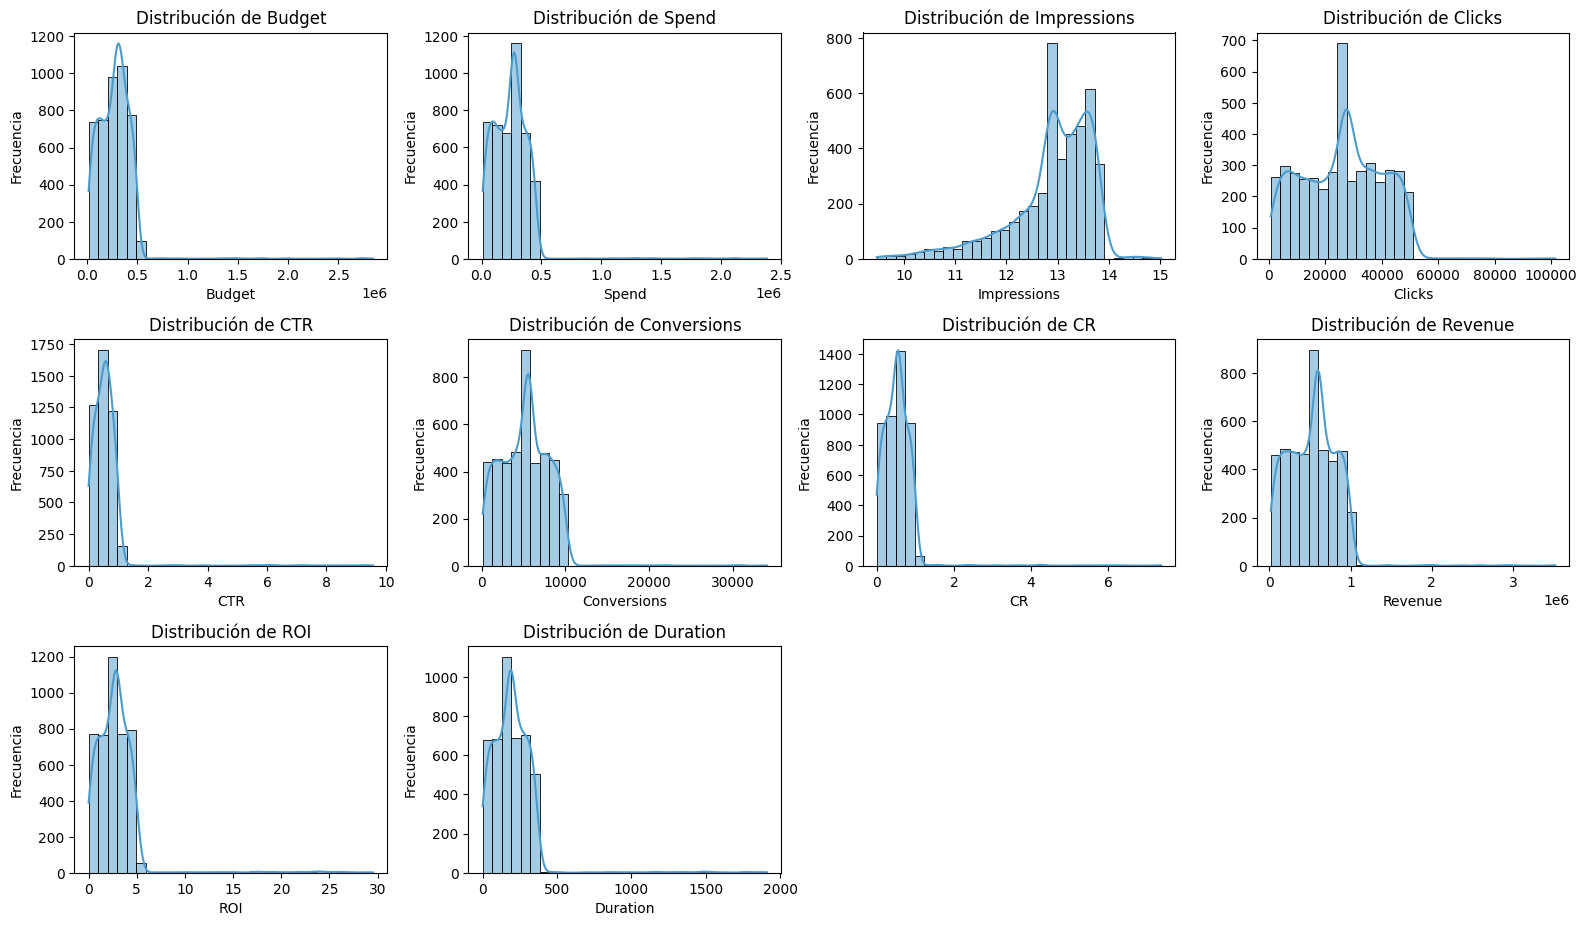

In [79]:
# Crear Histogramas y gráficos de KDE para las variables numéricas en bucle
# Establecer el tamaño de la figura para todos los gráficos
plt.figure(figsize=(16, 12))

# Iterar sobre cada columna numérica y generar los gráficos
for i, col in enumerate(num_vars, 1):
    plt.subplot(4, 4, i)  # Crear una cuadrícula de subplots, ajusta 4x4 según el número de variables
    sns.histplot(df3[col], kde=True, bins=30, color='#4B9CCC')  # Histogramas con KDE superpuesto
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

# Ajustar el diseño para que no haya solapamiento
plt.tight_layout()
plt.show()

In [80]:
#Segmentacion de las campañas en tres grupos (bajo, medio, alto) usando percentiles. 
# Crear los segmentos de cada variable
df3['Budget_segment'] = pd.qcut(df3['Budget2'], q=3, labels=['bajo', 'medio', 'alto'])
df3['Clicks_segment'] = pd.qcut(df3['Clicks2'], q=3, labels=['bajo', 'medio', 'alto'])
df3['Conversions_segment'] = pd.qcut(df3['Conversions2'], q=3, labels=['bajo', 'medio', 'alto'])

Se hara un calculo del rendimiento promedio en cada segmento

In [81]:
budget_analysis = df3.groupby('Budget_segment', observed=True)[['CTR', 'CR', 'Revenue', 'ROI']].mean()

In [82]:
#Análisis por Segmento de Budget:
budget_analysis

CTR        CR        Revenue       ROI
Budget_segment                                             
bajo            0.587143  0.566560  523266.875784  2.762681
medio           0.591408  0.578321  533259.461783  2.822128
alto            0.592846  0.522104  537094.229546  2.864170

In [83]:
clicks_analysis = df3.groupby('Clicks_segment', observed=True)[['CTR', 'CR', 'Revenue', 'ROI']].mean()

In [84]:
#Análisis por Segmento de Clicks:
clicks_analysis

CTR        CR        Revenue       ROI
Clicks_segment                                             
bajo            0.600957  0.564665  521933.682849  2.758222
medio           0.601203  0.547940  538113.775500  2.811581
alto            0.569237  0.554380  533573.108765  2.879176

In [85]:
conversions_analysis = df3.groupby('Conversions_segment', observed=True)[['CTR', 'CR', 'Revenue', 'ROI']].mean()

In [86]:
#Análisis por Segmento de Conversions:
conversions_analysis

CTR        CR        Revenue       ROI
Conversions_segment                                             
bajo                 0.586445  0.560043  533217.996900  2.794854
medio                0.594879  0.554183  522089.549494  2.868297
alto                 0.590073  0.552759  538313.020719  2.785827

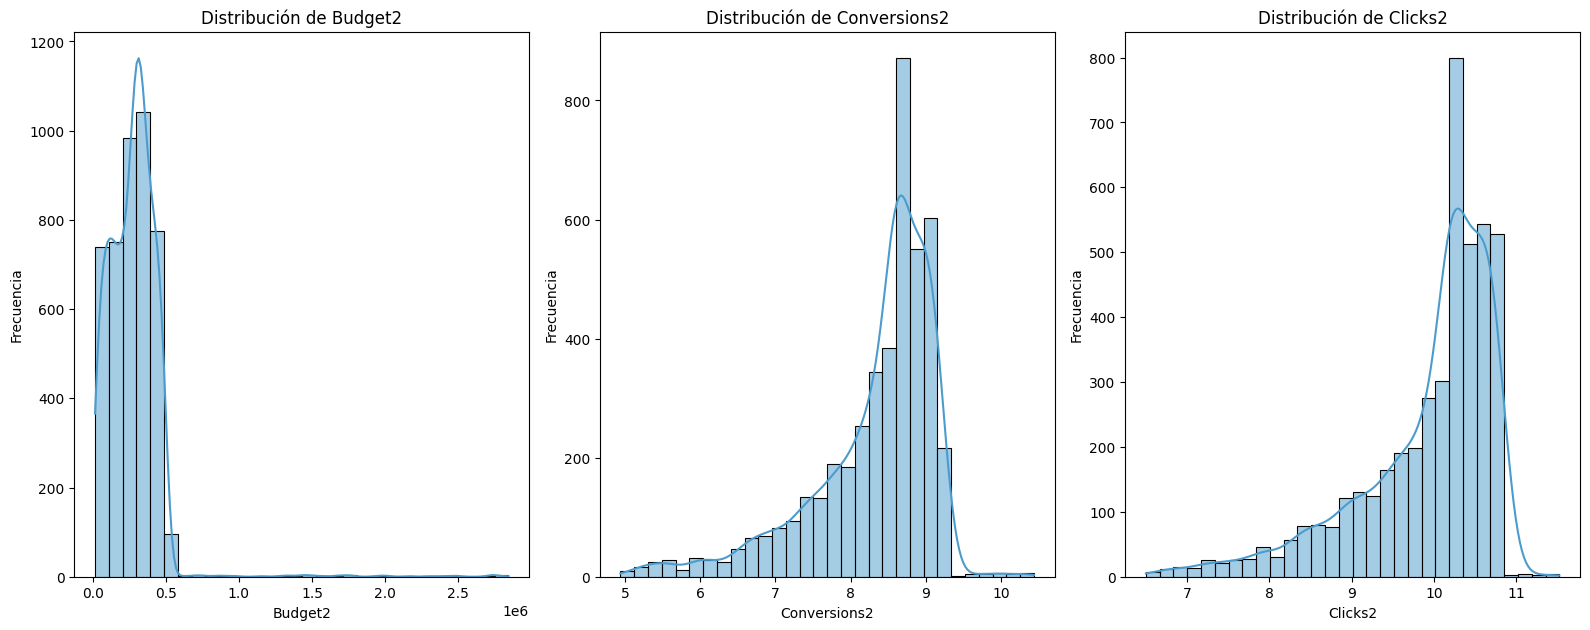

In [87]:
analysis_list = ['Budget2', 'Conversions2', 'Clicks2']

plt.figure(figsize=(16, 12))

for i, col in enumerate(analysis_list, 1):
    plt.subplot(2, 3, i)  # Crear una cuadrícula de subplots, ajusta 2x3 según el número de variables
    sns.histplot(df3[col], kde=True, bins=30, color='#4B9CCC')  # Histogramas con KDE superpuesto
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

# Ajustar el diseño para que no haya solapamiento
plt.tight_layout()
plt.show()

###### Al segmentar las campañas por Budget, Clicks, y Conversions, puedes identificar patrones de rendimiento. Por ejemplo:Las campañas con alto Budget podrían mostrar un alto Revenue pero un menor ROI si no están bien optimizadas.Las campañas con muchas Conversions pueden tener un buen rendimiento en términos de ingresos, pero necesitas verificar si están alineadas con Budget y Clicks para lograr un alto ROI. Este enfoque de segmentación te permitirá identificar oportunidades para mejorar el rendimiento de las campañas en función de su presupuesto, número de clics y conversiones, y optimizar tu estrategia en consecuencia.

#### Analiza la frecuencia de variables categóricas y crear gráficos de barras.

In [88]:
#Para poder guardar notebook de jupyter en formato csv
df3.to_csv("Proyecto_v3_df3.csv", index=False)


In [89]:
#calcular las frecuencias de las variables categóricas
def calcular_frecuencia_categoricas(df3):
# Seleccionar columnas categóricas
    categorical_columns = df3.select_dtypes(include=['object', 'category']).columns
    frequency_data = {col: df3[col].value_counts() for col in categorical_columns}
    return frequency_data

In [90]:
def graficar_frecuencia_categoricas(frequency_data, top_n=10):
    plt.figure(figsize=(15, 10))

    # Iterar sobre el diccionario de frecuencias y graficar cada columna
    for i, (col, freqs) in enumerate(frequency_data.items(), 1):
        plt.subplot(3, 3, i)  # Ajustar el tamaño de la cuadrícula si es necesario
        top_freqs = freqs.nlargest(top_n)  # Mostrar solo las top_n categorías
        sns.barplot(x=top_freqs.index, y=top_freqs.values, color='#636B73')
        plt.title(f"Frecuencia de {col}")
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()



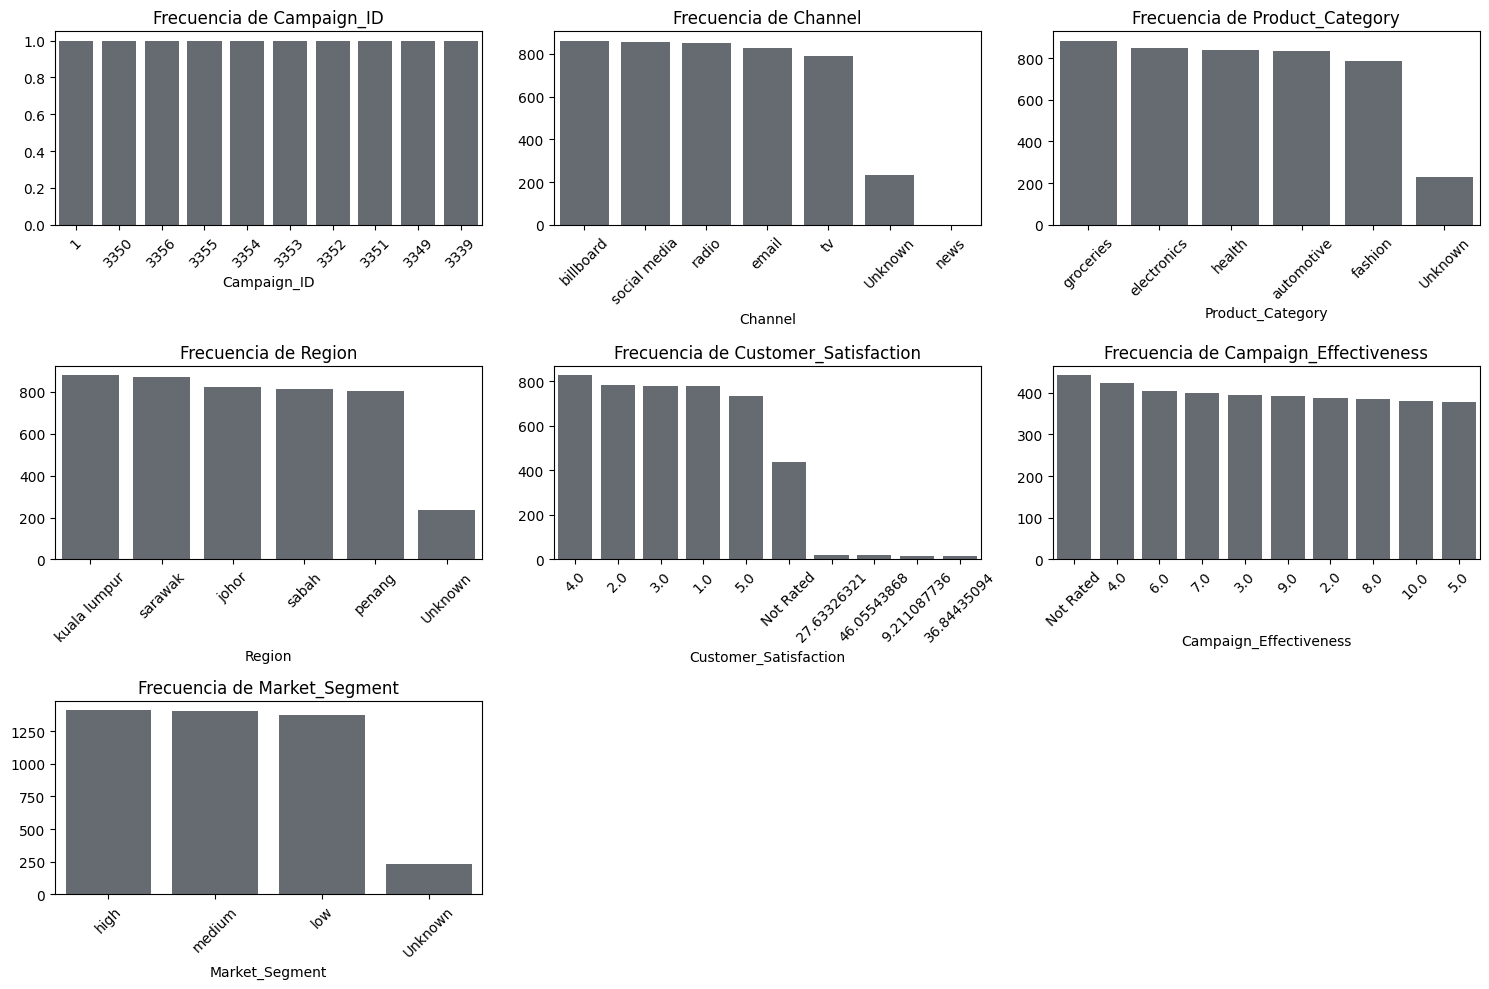

In [91]:
# Filtrar las columnas categóricas para excluir 'Start_Date' y 'End_Date'
cat_vars_filtered = cat_vars.drop(['Start_Date', 'End_Date'])

# Calcular las frecuencias de las variables categóricas filtradas
frequency_data_filtered = {col: df3[col].value_counts() for col in cat_vars_filtered}

# Graficar las frecuencias de las variables categóricas filtradas
graficar_frecuencia_categoricas(frequency_data_filtered)




#### 5.2 Análisis Bivariado

- Explora relaciones entre dos variables:
  - **Numérica vs Numérica**: Gráficos de dispersión, calcular correlaciones.
  - **Categórica vs Numérica**: Gráficos de cajas, gráficos de violín.
  - **Categórica vs Categórica**: Tablas de contingencia, heatmaps.

In [92]:
num_vars

Index(['Budget', 'Spend', 'Impressions', 'Clicks', 'CTR', 'Conversions', 'CR',
       'Revenue', 'ROI', 'Duration'],
      dtype='object')

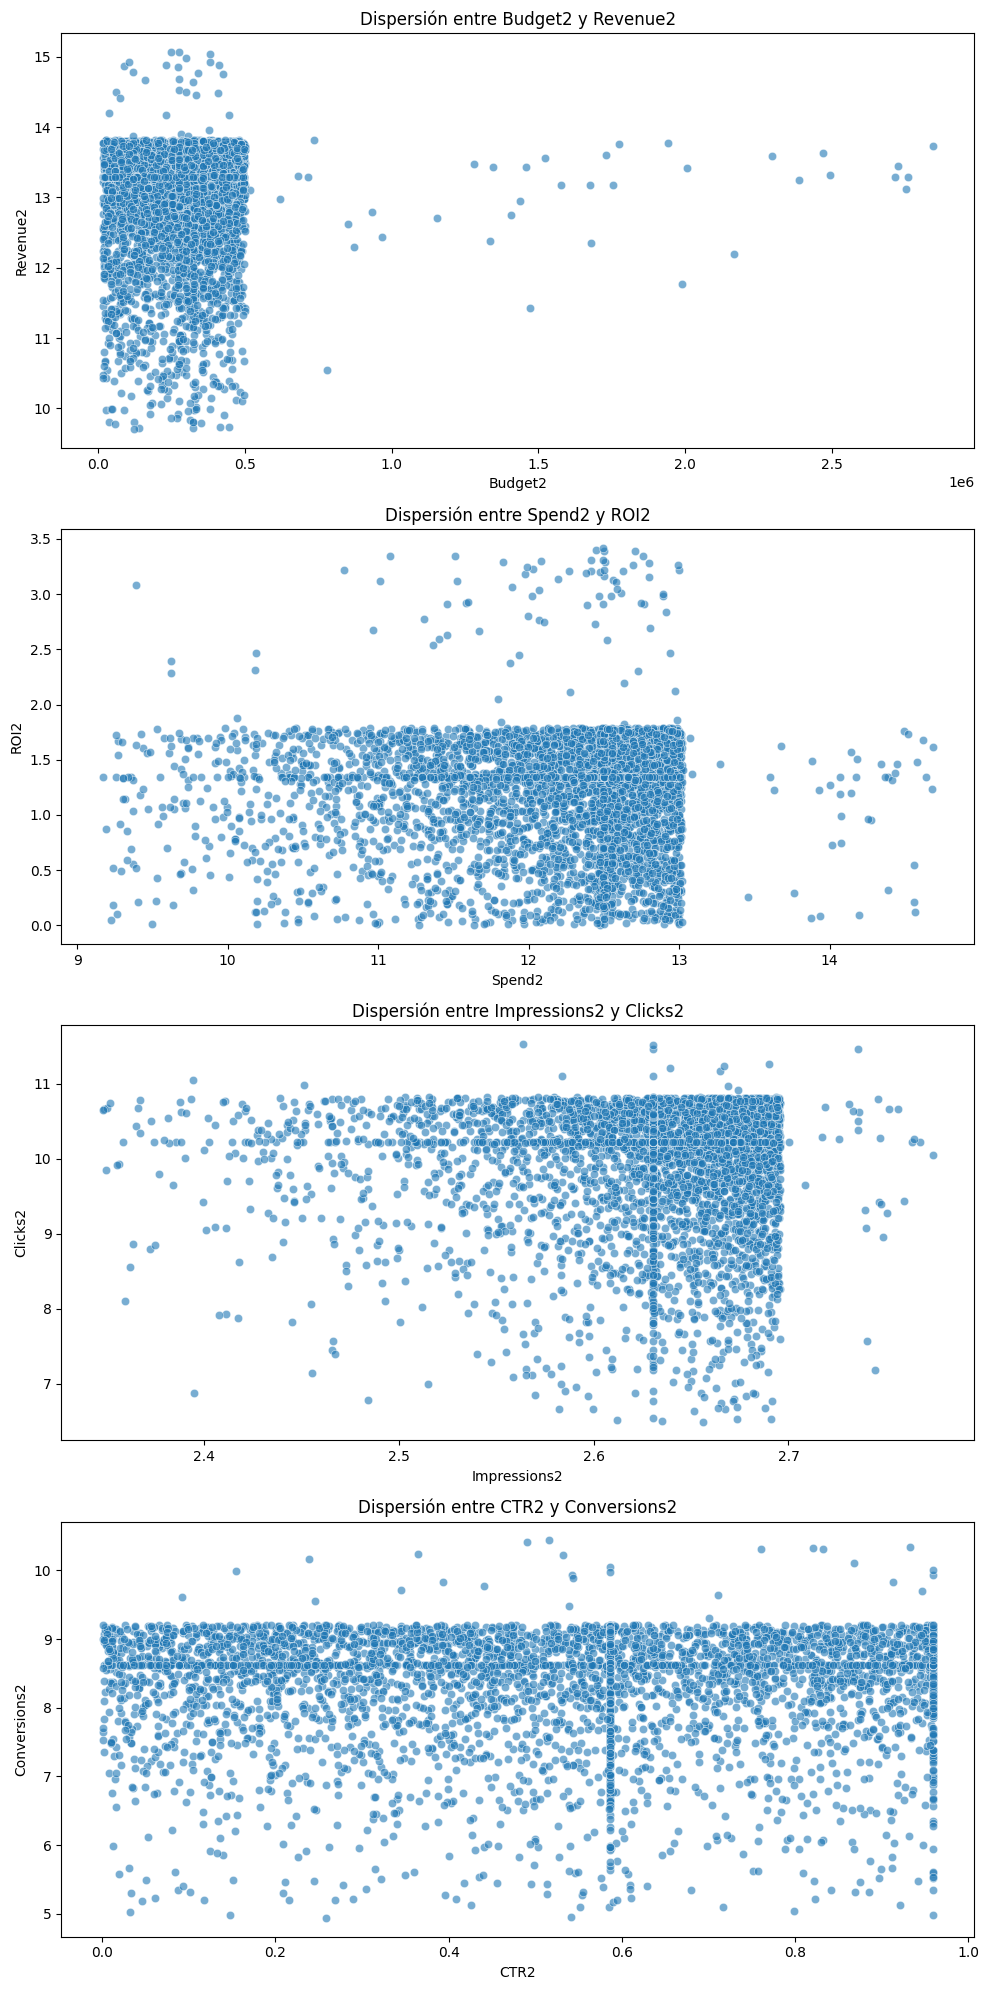

In [93]:
#Numerica vs Numerica [Grafico de dispersion]
def graficar_dispersions_para_pares(df3, var_pairs): #var_pairs: Es una lista de tuplas donde cada tupla contiene un par de nombres de columnas para graficar.
    plt.figure(figsize=(10, len(var_pairs) * 5))

    # Generar gráficos de dispersión para cada par
    for i, (x_var, y_var) in enumerate(var_pairs, 1):
        plt.subplot(len(var_pairs), 1, i) #plt.subplot(len(var_pairs), 1, i): Crea una fila en la cuadrícula de subplots para cada par de variables, adaptándose dinámicamente al número de pares especificados.
        sns.scatterplot(data=df3, x=x_var, y=y_var, alpha=0.6)
        plt.title(f"Dispersión entre {x_var} y {y_var}")
        plt.xlabel(x_var)
        plt.ylabel(y_var)

    plt.tight_layout()
    plt.show()

var_pairs = [('Budget2', 'Revenue2'), ('Spend2', 'ROI2'), ('Impressions2', 'Clicks2'), ('CTR2', 'Conversions2')]
graficar_dispersions_para_pares(df3, var_pairs)

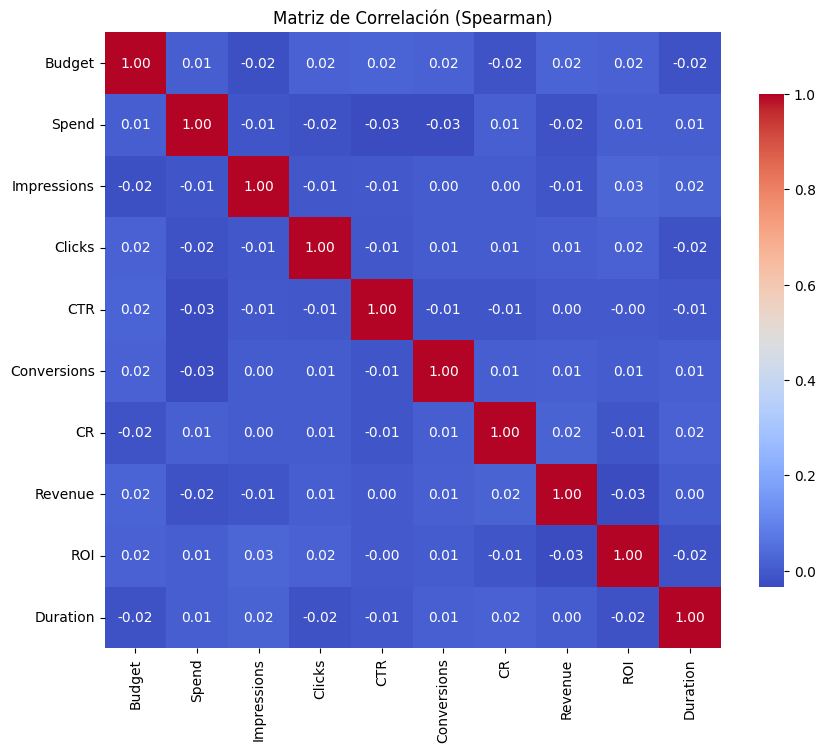

In [94]:
#Numerica vs Numerica [Correlaciones]
def calcular_y_graficar_correlacion(df3, num_vars, method='spearman'):
    # Seleccionar solo las variables especificadas
    df_numerical = df3[num_vars]
    
    # Calcular la matriz de correlación
    corr_matrix = df_numerical.corr(method=method)
    
    # Graficar la matriz de correlación usando un heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={'shrink': .8})
    plt.title(f"Matriz de Correlación ({method.capitalize()})")
    plt.show()
    
    return corr_matrix  # Devolver la matriz de correlación para análisis adicional


correlation_matrix = calcular_y_graficar_correlacion(df3, num_vars, method='spearman')


In [95]:
cat_vars

Index(['Campaign_ID', 'Channel', 'Product_Category', 'Region', 'Start_Date',
       'End_Date', 'Customer_Satisfaction', 'Campaign_Effectiveness',
       'Market_Segment'],
      dtype='object')

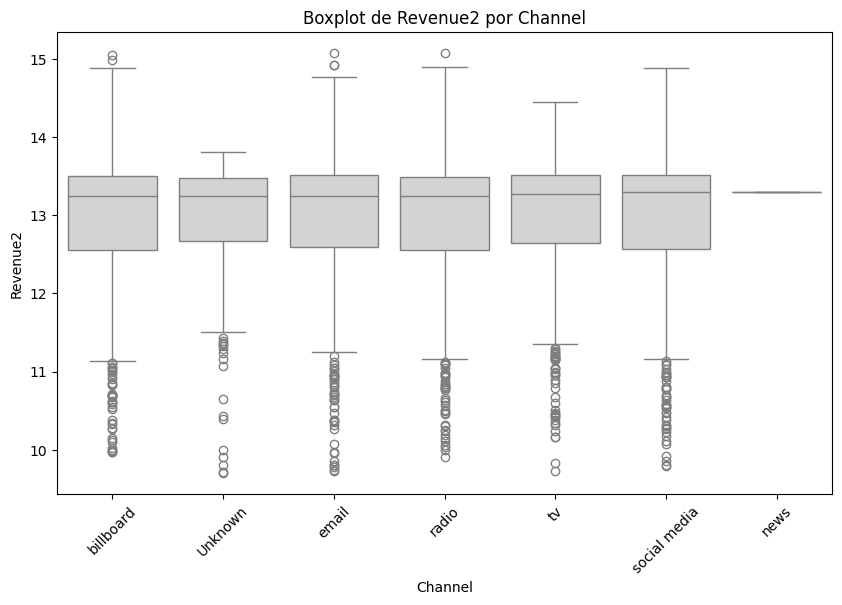

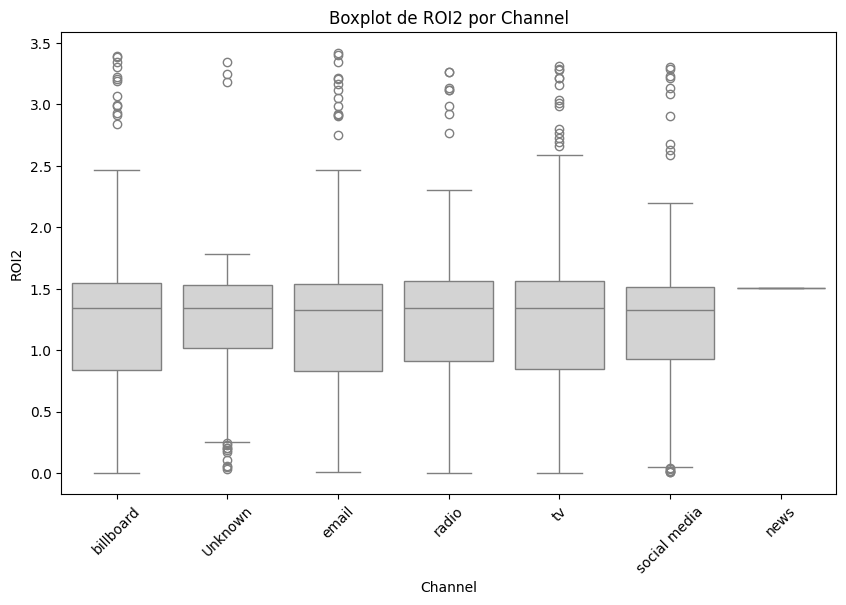

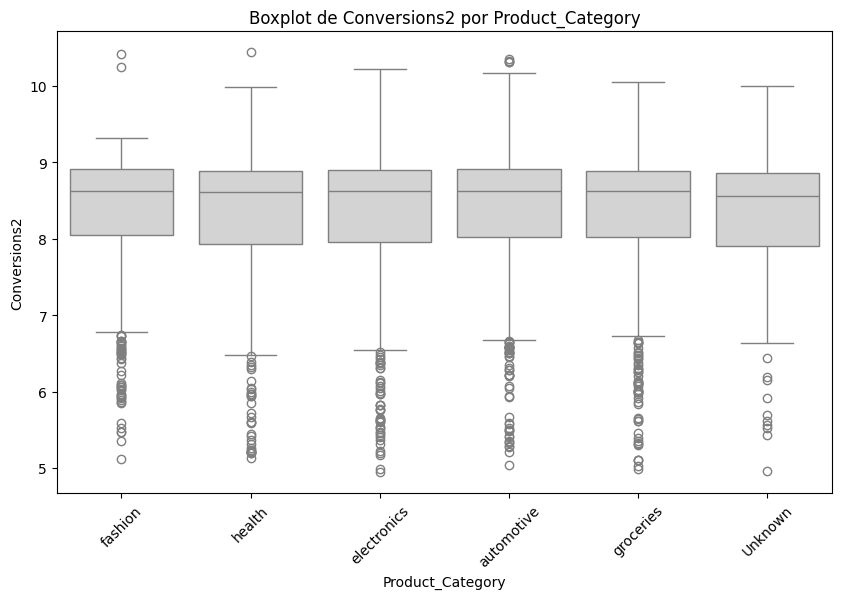

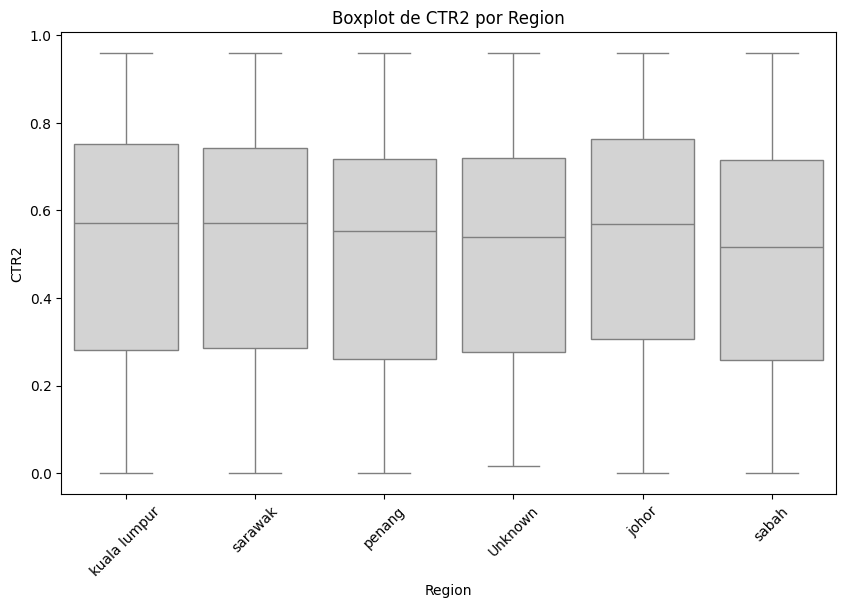

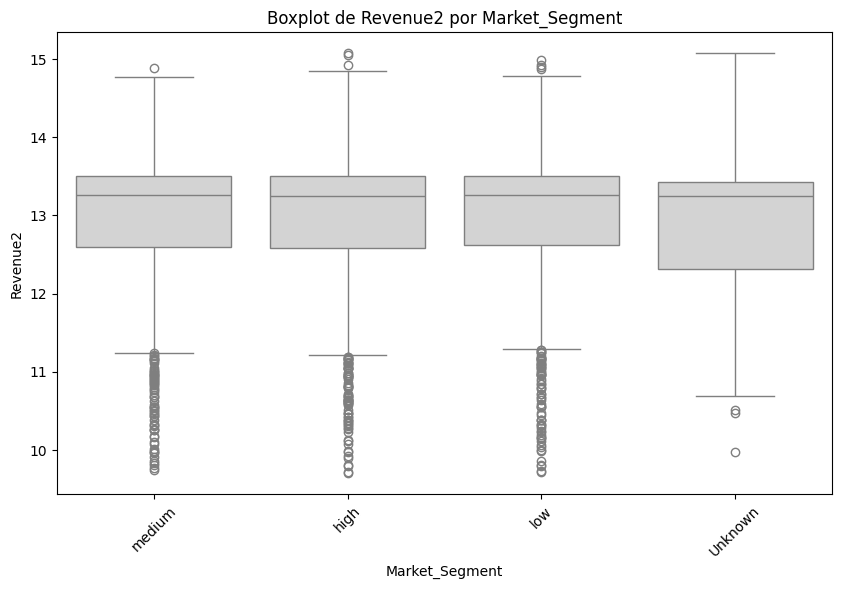

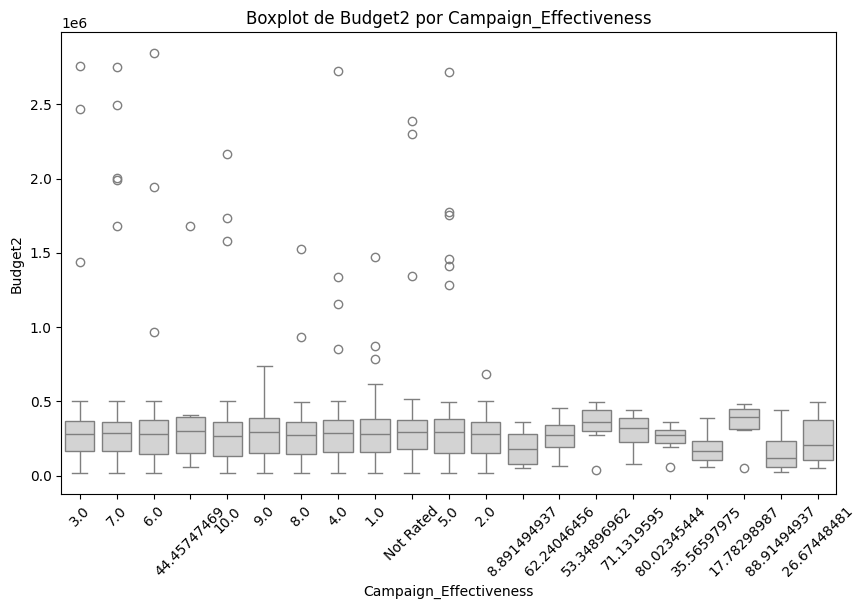

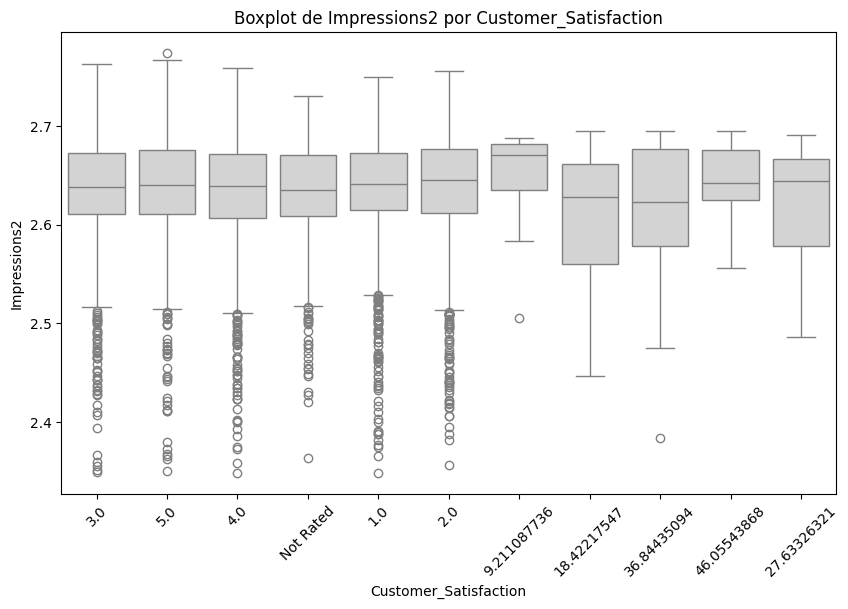

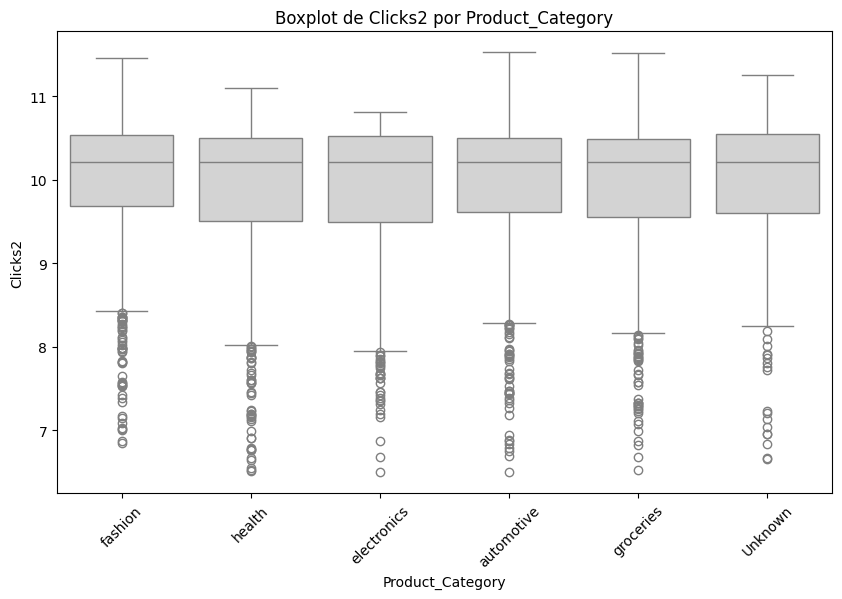

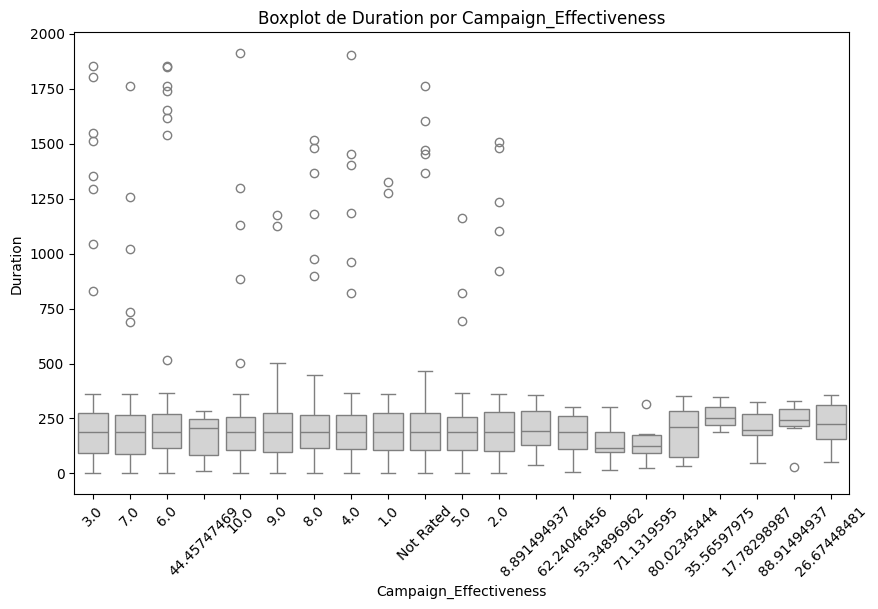

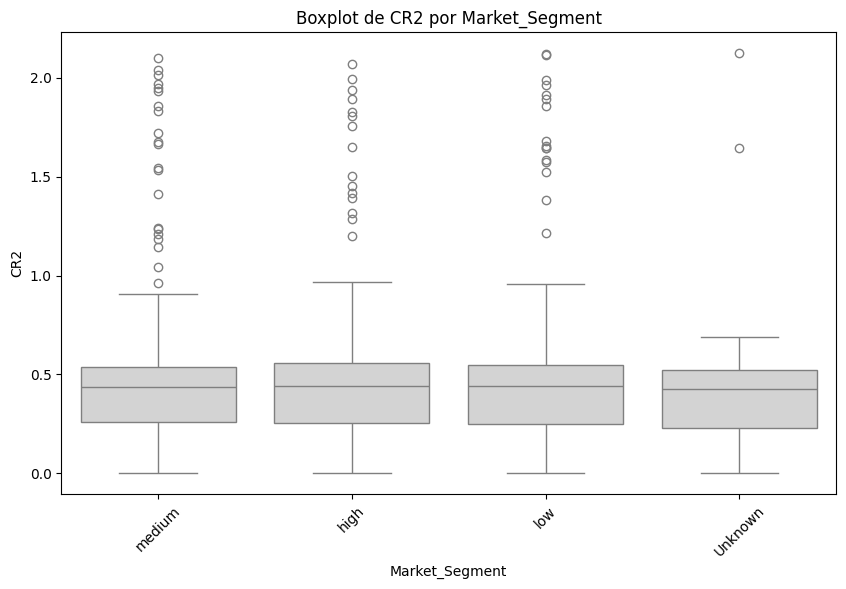

In [96]:
#Categorica vs Numerica [Boxplot]
def box_cat_num(df3, num_var, cat_var):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df3, x=cat_var, y=num_var, color='lightgrey')
    plt.title(f"Boxplot de {num_var} por {cat_var}")
    plt.xlabel(cat_var)
    plt.ylabel(num_var)
    plt.xticks(rotation=45)
    plt.show()
# Lista de pares elegidos (numérico vs categórico)
pares_elegidos = [
    ('Revenue2', 'Channel'),
    ('ROI2', 'Channel'),
    ('Conversions2', 'Product_Category'),
    ('CTR2', 'Region'),
    ('Revenue2', 'Market_Segment'),
    ('Budget2', 'Campaign_Effectiveness'),
    ('Impressions2', 'Customer_Satisfaction'),
    ('Clicks2', 'Product_Category'),
    ('Duration', 'Campaign_Effectiveness'),
    ('CR2', 'Market_Segment')
]

for num_var, cat_var in pares_elegidos:
    box_cat_num(df3, num_var, cat_var)

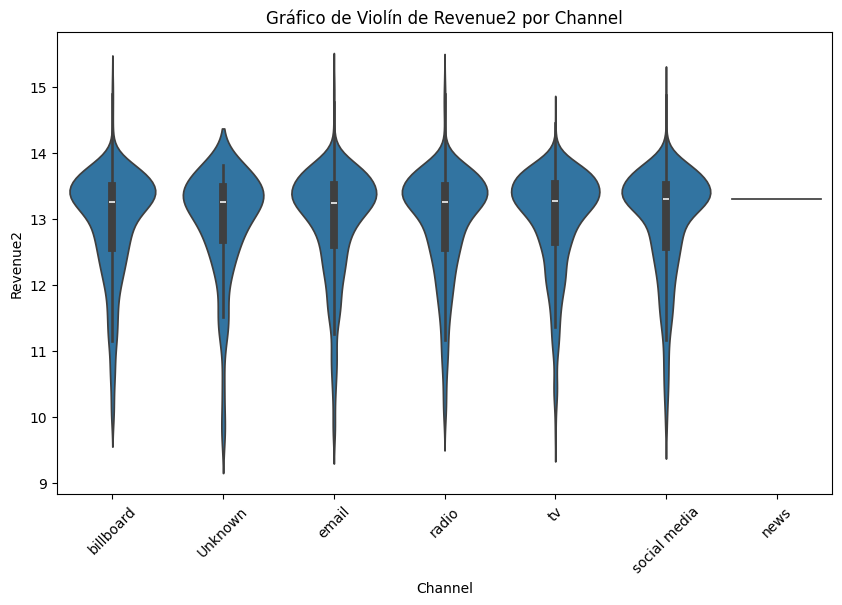

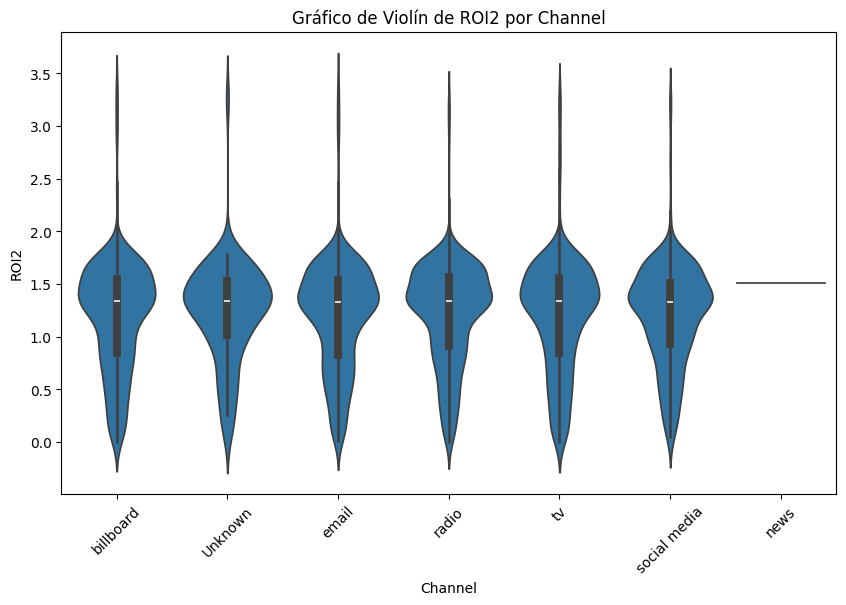

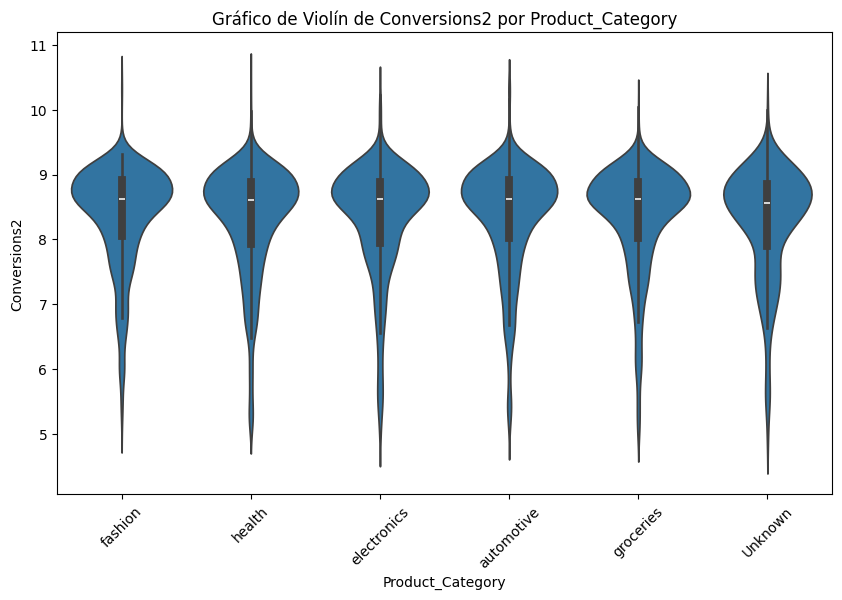

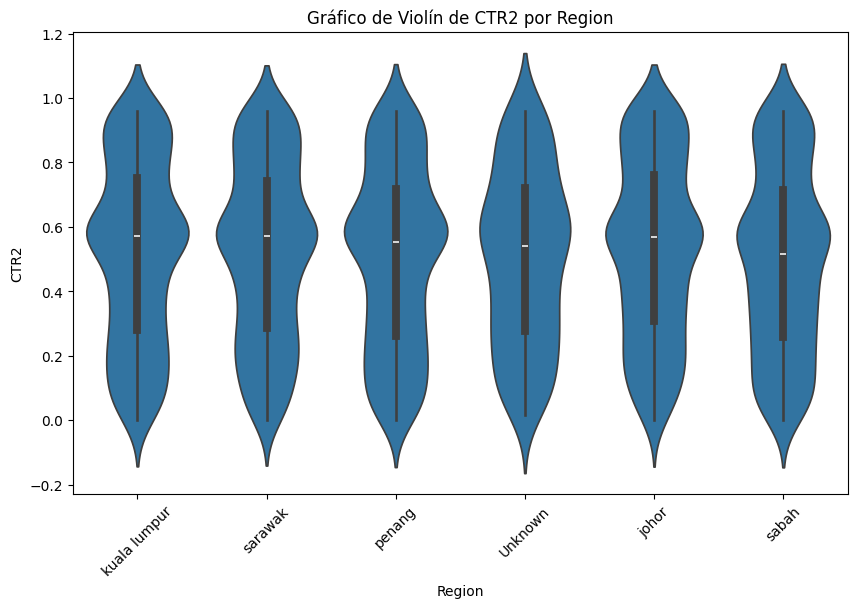

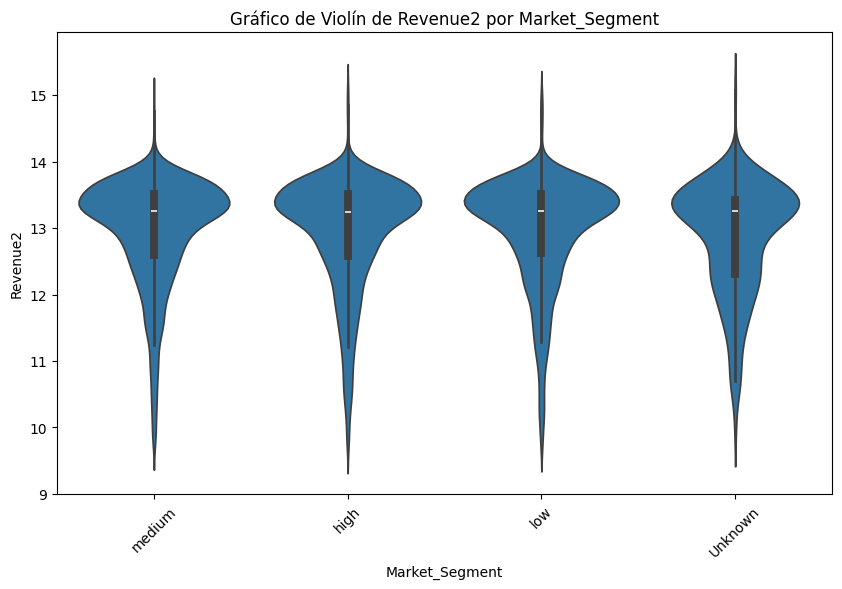

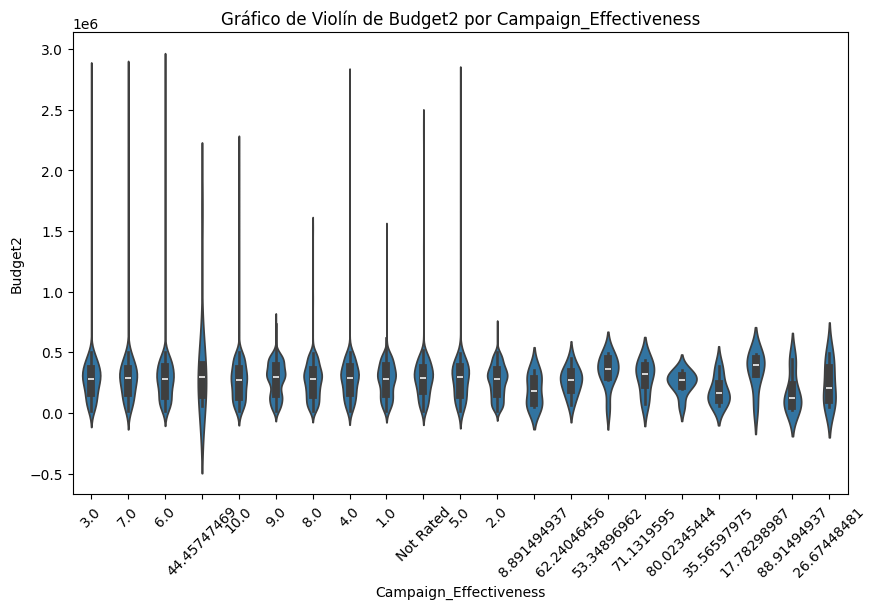

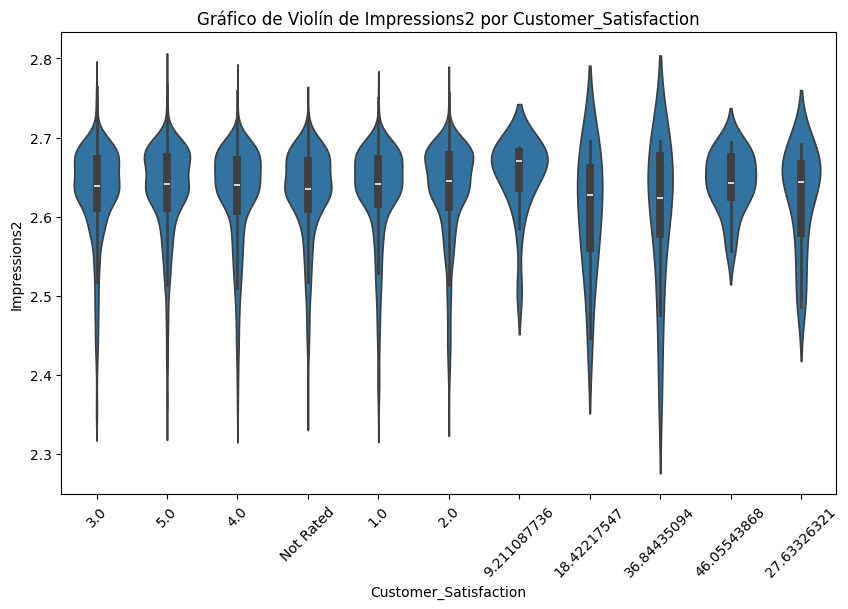

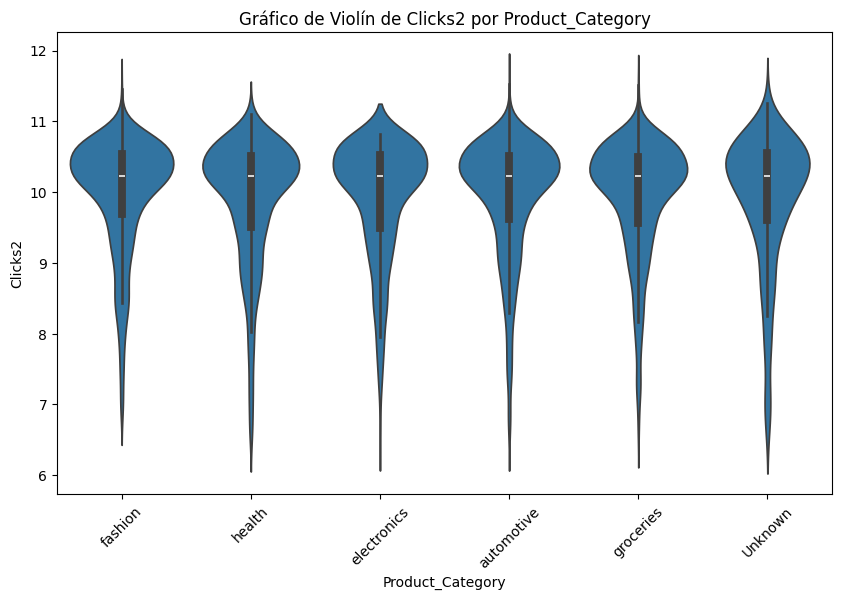

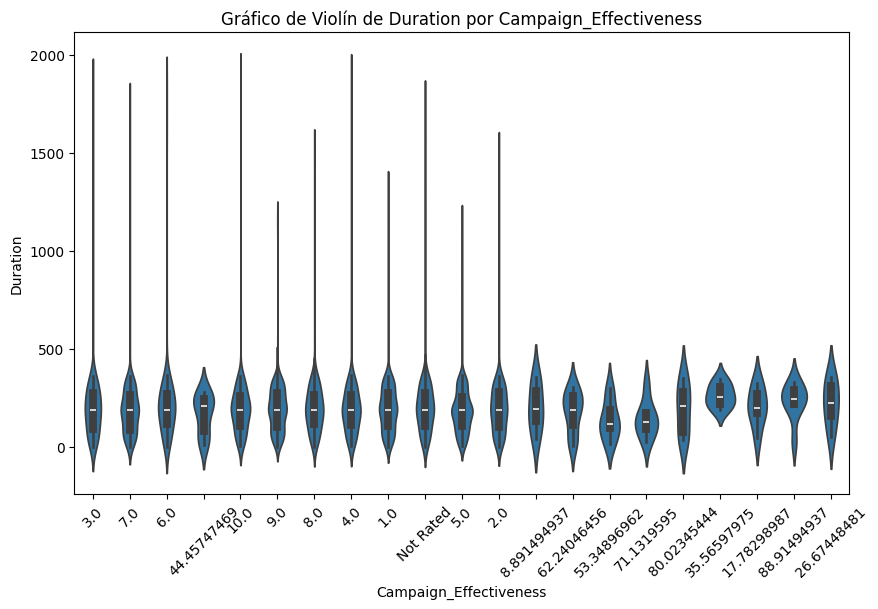

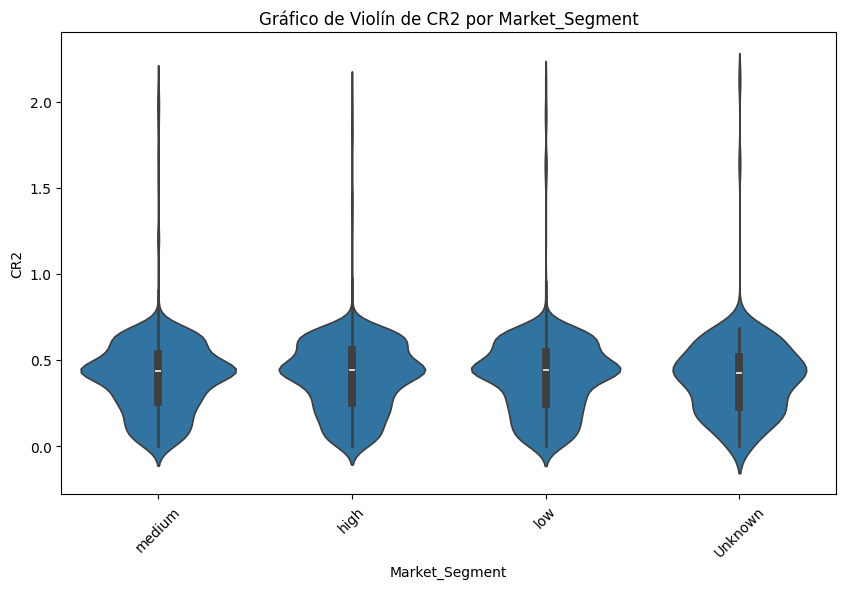

In [97]:
#Categorica vs Numerica [Violin]
def graficar_violin(df3, num_var, cat_var):
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=df3, x=cat_var, y=num_var, inner='box')
    plt.title(f"Gráfico de Violín de {num_var} por {cat_var}")
    plt.xlabel(cat_var)
    plt.ylabel(num_var)
    plt.xticks(rotation=45)
    plt.show()
# Lista de pares elegidos (numérico vs categórico)
pares_elegidos = [
    ('Revenue2', 'Channel'),
    ('ROI2', 'Channel'),
    ('Conversions2', 'Product_Category'),
    ('CTR2', 'Region'),
    ('Revenue2', 'Market_Segment'),
    ('Budget2', 'Campaign_Effectiveness'),
    ('Impressions2', 'Customer_Satisfaction'),
    ('Clicks2', 'Product_Category'),
    ('Duration', 'Campaign_Effectiveness'),
    ('CR2', 'Market_Segment')
]

# Graficar cada par de variables con gráficos de violín
for num_var, cat_var in pares_elegidos:
    graficar_violin(df3, num_var, cat_var)

In [98]:
#Categorica vs Categorica [Tablas de contingencia]
def tabla_contingencia(df3, cat_var1, cat_var2):
    tabla = pd.crosstab(df3[cat_var1], df3[cat_var2])
    print(f"Tabla de contingencia entre {cat_var1} y {cat_var2}:")
    print(tabla)
    return tabla
# Lista de combinaciones recomendadas
combinaciones_recomendadas = [
    ('Channel', 'Product_Category'),
    ('Channel', 'Region'),
    ('Market_Segment', 'Product_Category'),
    ('Campaign_Effectiveness', 'Customer_Satisfaction'),
    ('Channel', 'Campaign_Effectiveness'),
    ('Region', 'Market_Segment')
]

# Crear tablas de contingencia para cada combinación recomendada
tablas_contingencia = {}
for cat_var1, cat_var2 in combinaciones_recomendadas:
    tablas_contingencia[(cat_var1, cat_var2)] = tabla_contingencia(df3, cat_var1, cat_var2)

Tabla de contingencia entre Channel y Product_Category:
Product_Category  Unknown  automotive  electronics  fashion  groceries  health
Channel                                                                       
Unknown                12          39           49       37         48      47
billboard              43         164          156      165        187     148
email                  45         157          164      144        169     151
news                    0           0            0        1          0       0
radio                  41         167          166      150        162     166
social media           53         163          172      144        154     169
tv                     36         142          141      147        164     159
Tabla de contingencia entre Channel y Region:
Region        Unknown  johor  kuala lumpur  penang  sabah  sarawak
Channel                                                           
Unknown             7     46            45      34   

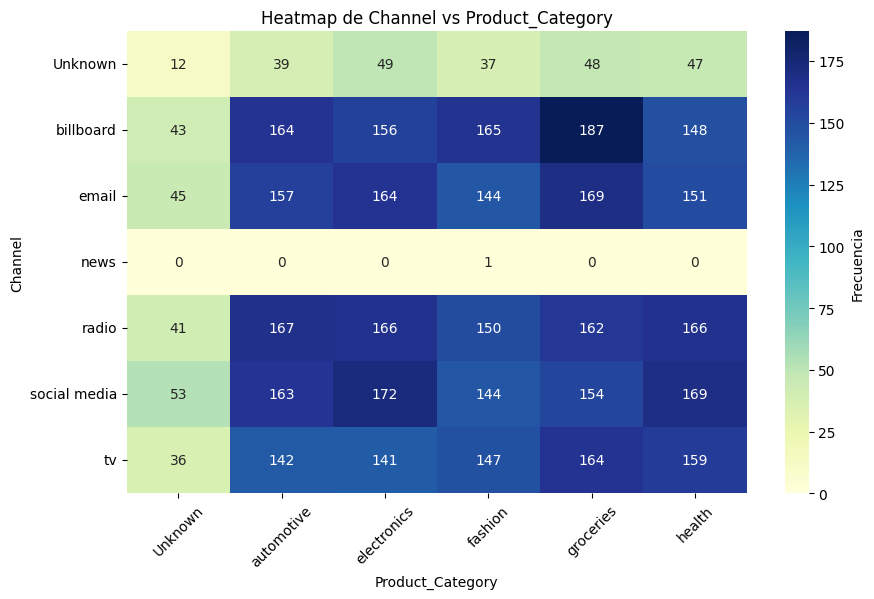

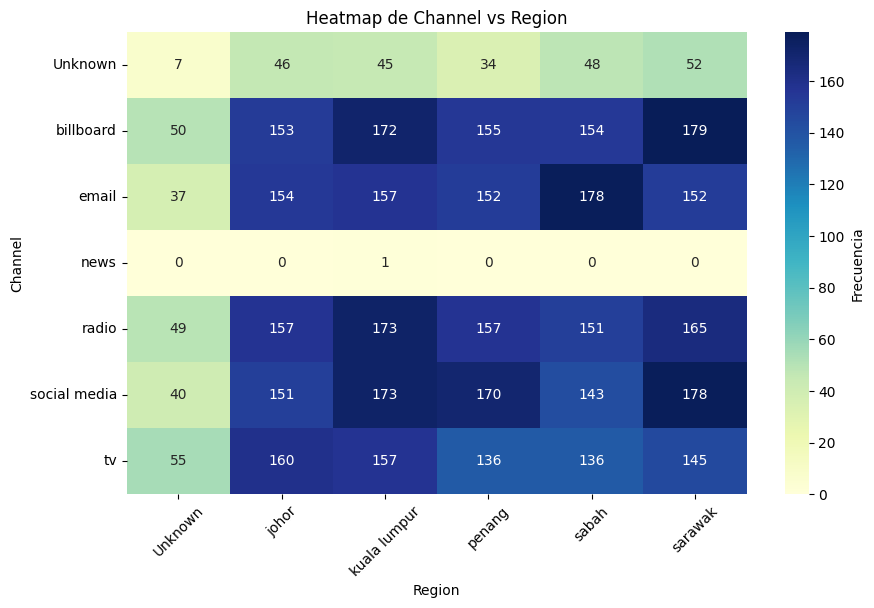

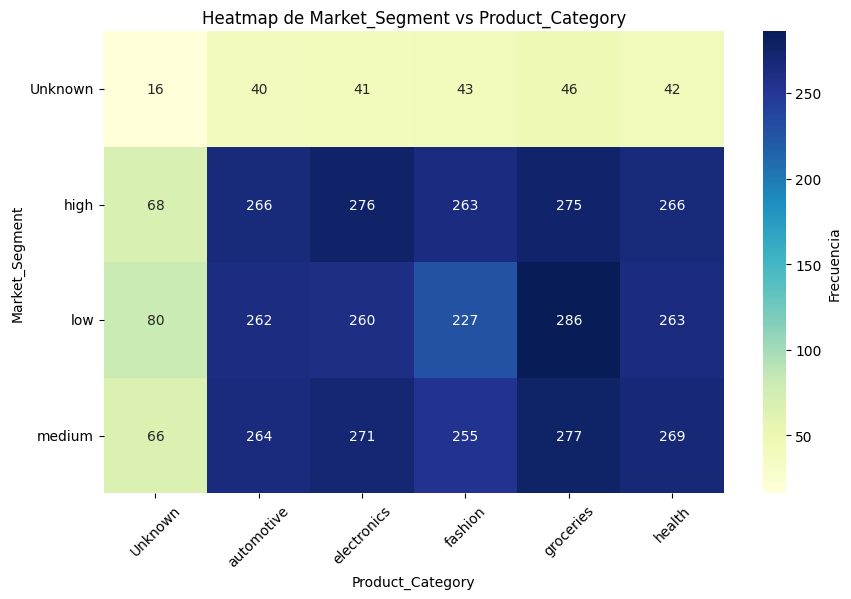

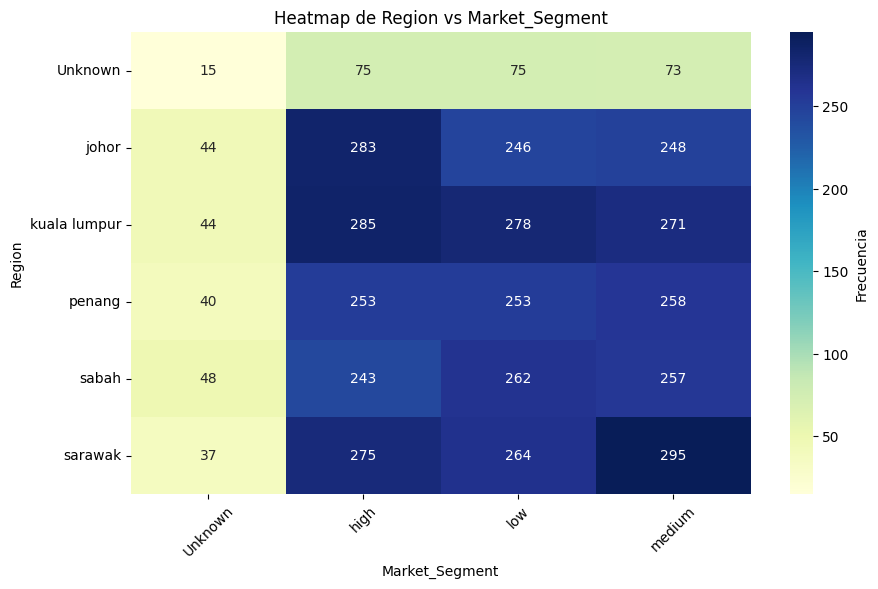

In [99]:
#Categorica vs Categorica [Heatmaps]
def heatmap_contingencia(df3, cat_var1, cat_var2):
# Crear la tabla de contingencia
    tabla = pd.crosstab(df3[cat_var1], df3[cat_var2])
    
# Crear el heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(tabla, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Frecuencia'})
    plt.title(f"Heatmap de {cat_var1} vs {cat_var2}")
    plt.xlabel(cat_var2)
    plt.ylabel(cat_var1)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

# Lista de combinaciones recomendadas
combinaciones_recomendadas = [
    ('Channel', 'Product_Category'),
    ('Channel', 'Region'),
    ('Market_Segment', 'Product_Category'),
    ('Region', 'Market_Segment')
]

# Crear y mostrar heatmaps para cada combinación recomendada
for cat_var1, cat_var2 in combinaciones_recomendadas:
    heatmap_contingencia(df3, cat_var1, cat_var2)

#### 5.3 Análisis Multivariado

- Crea matrices de correlación para variables numéricas.
- Realiza análisis de clusters o segmentación si es relevante.

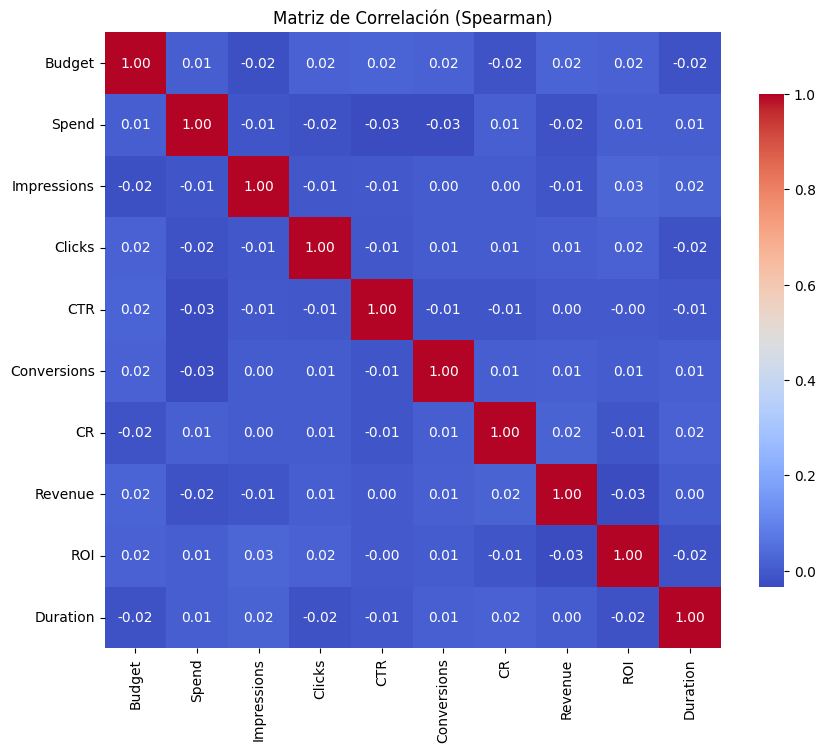

In [100]:
def matriz_correlacion(df3, variables_numericas, metodo='spearman'):
# Filtrar el DataFrame para incluir solo las variables numéricas especificadas
    df_numerico = df3[variables_numericas]
    
# Calcular la matriz de correlación
    matriz_correlacion = df_numerico.corr(method=metodo)
    
# Visualizar la matriz de correlación usando un heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={'shrink': .8})
    plt.title(f"Matriz de Correlación ({metodo.capitalize()})")
    plt.show()
    
    return matriz_correlacion

# Lista de variables numéricas para crear la matriz de correlación
variables_numericas = ['Budget', 'Spend', 'Impressions', 'Clicks', 'CTR', 'Conversions', 'CR', 
                        'Revenue', 'ROI', 'Duration']

matriz_correlacion = matriz_correlacion(df3, variables_numericas, metodo='spearman')

In [101]:
#Realiza análisis de clusters o segmentación si es relevante.

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

def clustering(df3, variables, n_clusters=3):
# Filtrar las variables relevantes para el clustering
    data_clustering = df3[variables]
    
# Estandarizar los datos
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data_clustering)
    
# Realizar K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data_scaled)
    
# Agregar los clusters al DataFrame original
    df3['Cluster'] = clusters
    
# Visualización de los clusters en el espacio de dos de las variables
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df3, x=variables[0], y=variables[1], hue='Cluster', palette='viridis', s=100, alpha=0.6)
    plt.title(f"Análisis de Clustering (K-means) con {n_clusters} clusters")
    plt.show()
    
    return df3

# Variables numéricas a usar en el clustering
variables_numericas = ['Budget2', 'Spend2', 'Revenue2', 'ROI2']


In [102]:
#Metodo del codo para evaluar el mejor numero de clusters
def metodo_del_codo(data_scaled, max_k=10):
    inertias = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data_scaled)
        inertias.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_k+1), inertias, marker='o')
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Método del Codo para Selección de k')
    plt.show()



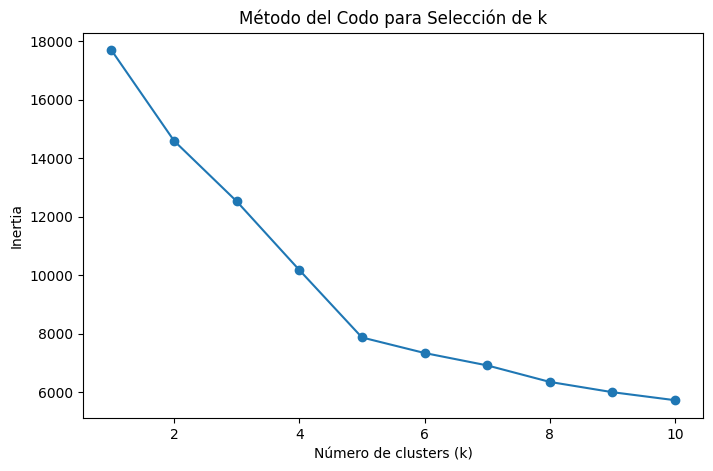

In [103]:
from sklearn.preprocessing import StandardScaler

# Variables numéricas a usar en el clustering
variables_numericas = ['Budget2', 'Spend2', 'Revenue2', 'ROI2']

# Filtrar las variables relevantes para el clustering
data_clustering = df3[variables_numericas]

# Estandarizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clustering)

# Llamar al método del codo
metodo_del_codo(data_scaled)

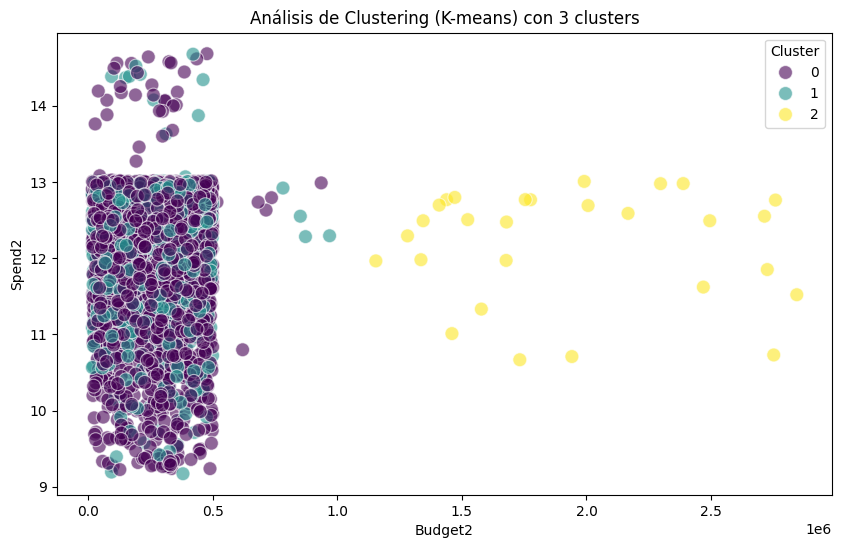

Budget2     Spend2   Revenue2      ROI2
Cluster                                              
0        2.670190e+05  12.132668  13.314565  1.164833
1        2.673465e+05  12.200975  11.718036  1.314089
2        1.934402e+06  12.177669  13.116106  1.211617

In [104]:
# Perform clustering on df3
df3_segmentado = clustering(df3, variables_numericas, n_clusters=3)

# Group by cluster and calculate the mean of the numerical variables
df3_segmentado.groupby('Cluster')[variables_numericas].mean()

### 6. Visualización de Datos

- Utiliza **Matplotlib** y **Seaborn** para crear visualizaciones estáticas.
- Utiliza **Plotly** para crear visualizaciones interactivas.
- Algunas visualizaciones sugeridas:
  - **Gráficos de barras**: Ingresos por canal, ROI por categoría de producto.
  - **Mapas geográficos**: Rendimiento por región.
  - **Series temporales**: Tendencias de impresiones y clics a lo largo del tiempo.

In [105]:
#Graficos de barras: 
import plotly.express as px

def grafico_barras_interactivo(df3, x_var, y_var, title,color_unico=None, color_discreto=None):
    if color_unico:
        fig = px.bar(df3, x=x_var, y=y_var, title=title, text=y_var,
                        labels={x_var: x_var, y_var: y_var})
        fig.update_traces(marker_color=color_unico, texttemplate='%{text:.2s}', textposition='outside')
    elif color_discreto:
        fig = px.bar(df3, x=x_var, y=y_var, title=title, text=y_var, color=x_var,
                        labels={x_var: x_var, y_var: y_var},
                        color_discrete_sequence=color_discreto)
        fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
    else:
        fig = px.bar(df3, x=x_var, y=y_var, title=title, text=y_var, labels={x_var: x_var, y_var: y_var})
        fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

    fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
    return fig

In [106]:
# Gráfico de Ingresos por Canal
color_discreto = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A']  # Colores personalizados para las categorías
grafico_ingresos_por_canal = grafico_barras_interactivo(df3, 'Channel', 'Revenue', 'Ingresos por Canal', color_discreto=color_discreto)
grafico_ingresos_por_canal.show()

In [107]:
# Gráfico de ROI por Categoría de Producto
color_discreto = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A']  # Colores personalizados para las categorías
grafico_roi_por_categoria = grafico_barras_interactivo(df3, 'Product_Category', 'ROI', 'ROI por Categoría de Producto', color_discreto=color_discreto)
grafico_roi_por_categoria.show()

In [108]:
df3.Region.unique()

array(['kuala lumpur', 'sarawak', 'penang', 'Unknown', 'johor', 'sabah'],
      dtype=object)

In [112]:
# Diccionario con las coordenadas manuales de las ubicaciones conocidas
coordenadas = {
    'kuala lumpur': {'Latitude': 3.1390, 'Longitude': 101.6869},
    'sarawak': {'Latitude': 1.5533, 'Longitude': 110.3592},
    'penang': {'Latitude': 5.4164, 'Longitude': 100.3327},
    'johor': {'Latitude': 1.4927, 'Longitude': 103.7414},
    'sabah': {'Latitude': 5.9788, 'Longitude': 116.0753},
    'Unknown': {'Latitude': None, 'Longitude': None}  # para ubicaciones desconocidas
}

# Ejemplo de DataFrame con tus datos de región
df4 = pd.DataFrame({
    'Region': ['kuala lumpur', 'sarawak', 'penang', 'Unknown', 'johor', 'sabah'],
    'Revenue': [100000, 150000, 200000, 50000, 120000, 180000]  # ejemplo de ingresos
})

# Agregar las coordenadas al DataFrame
df4['Latitude'] = df4['Region'].apply(lambda x: coordenadas[x]['Latitude'] if x in coordenadas else None)
df4['Longitude'] = df4['Region'].apply(lambda x: coordenadas[x]['Longitude'] if x in coordenadas else None)

In [113]:
def mapa_puntos(df4, lat_col, lon_col, metric_col, region_col, title):
    fig = px.scatter_geo(
        df4,
        lat=lat_col,
        lon=lon_col,
        color=metric_col,
        hover_name=region_col,  # Nombre de la región al pasar el ratón
        size=metric_col,  # Tamaño de los puntos según la métrica
        color_continuous_scale="Viridis",
        title=title,
        labels={metric_col: metric_col}
    )
    fig.update_geos(projection_type="natural earth")
    fig.update_layout(coloraxis_colorbar=dict(title=metric_col))
    fig.show()

mapa_puntos(df4, "Latitude", "Longitude", "Revenue", "Region", "Ingresos por Ciudad")


### 7. Interpretación y Conclusiones

- Resume los hallazgos clave de tu análisis.
- Responde a preguntas como:
  - ¿Qué canales de marketing son más efectivos?
  - ¿Qué regiones generan más ingresos?
  - ¿Existe correlación entre el presupuesto y el ROI?
- Proporciona recomendaciones para futuras campañas.

In [167]:
# ¿Qué canales de marketing son más efectivos?

# Agrupar por canal y calcular métricas clave
efectividad_por_canal = df3.groupby('Channel').agg({
        'Revenue2': 'sum',               # Ingresos totales por canal
        'ROI': 'mean',                  # ROI promedio por canal
        'Conversions2': 'sum',           # Conversiones totales por canal
        'CTR2': 'mean',                  # CTR promedio por canal
        'Spend2': 'sum'                  # Gasto total por canal (para calcular Costo por Conversión)
    }).reset_index()

    # Calcular el Costo por Conversión
efectividad_por_canal['Costo_por_Conversion'] = efectividad_por_canal['Spend2'] / efectividad_por_canal['Conversions2']

# Mostrar la tabla de métricas de efectividad por canal
display(efectividad_por_canal)
# Filtrar los canales que no son 'Unknown'
efectividad_por_canal = efectividad_por_canal[efectividad_por_canal['Channel'] != 'Unknown']

# Mostrar la tabla de métricas de efectividad por canal sin 'Unknown'
display(efectividad_por_canal)


Channel      Revenue2       ROI  Conversions2      CTR2        Spend2  \
0       Unknown   3000.700336  2.895901   1911.462564  0.505141   2833.521517   
1     billboard  11157.348479  2.833346   7173.563433  0.517099  10461.855537   
2         email  10745.670927  2.831584   6900.618415  0.496889  10068.950254   
3          news     13.298368  3.510000      9.055906  0.237500     14.181126   
4         radio  11021.672715  2.785223   7093.746246  0.525146  10380.228041   
5  social media  11061.139465  2.749709   7156.489244  0.504804  10363.967968   
6            tv  10235.177701  2.863159   6550.779352  0.525255   9599.226684   

   Costo_por_Conversion  
0              1.482384  
1              1.458390  
2              1.459137  
3              1.565953  
4              1.463293  
5              1.448192  
6              1.465356

Channel      Revenue2       ROI  Conversions2      CTR2        Spend2  \
1     billboard  11157.348479  2.833346   7173.563433  0.517099  10461.855537   
2         email  10745.670927  2.831584   6900.618415  0.496889  10068.950254   
3          news     13.298368  3.510000      9.055906  0.237500     14.181126   
4         radio  11021.672715  2.785223   7093.746246  0.525146  10380.228041   
5  social media  11061.139465  2.749709   7156.489244  0.504804  10363.967968   
6            tv  10235.177701  2.863159   6550.779352  0.525255   9599.226684   

   Costo_por_Conversion  
1              1.458390  
2              1.459137  
3              1.565953  
4              1.463293  
5              1.448192  
6              1.465356

In [168]:
# Gráfico de Ingresos por Canal
fig_revenue = px.bar(efectividad_por_canal, x='Channel', y='Revenue2', title='Ingresos por Canal', text='Revenue2')
fig_revenue.show()

# Gráfico de ROI Promedio por Canal
efectividad_por_canal['ROI'] = efectividad_por_canal['ROI'].round(2)
fig_roi = px.bar(efectividad_por_canal, x='Channel', y='ROI', title='ROI Promedio por Canal', text='ROI')
fig_roi.show()
# Redondear a dos decimales
efectividad_por_canal['Costo_por_Conversion'] = efectividad_por_canal['Costo_por_Conversion'].round(2)

# Gráfico de Costo por Conversión por Canal
fig_cpc = px.bar(efectividad_por_canal, x='Channel', y='Costo_por_Conversion', title='Costo por Conversión por Canal', text='Costo_por_Conversion')
fig_cpc.show()

In [118]:
# Agrupar por región y calcular los ingresos totales por región
ingresos_por_region = df3.groupby('Region').agg({
    'Revenue': 'sum'  # Ingresos totales por región
}).reset_index()

# Ordenar las regiones por ingresos en orden descendente
ingresos_por_region = ingresos_por_region.sort_values(by='Revenue', ascending=False)

# Mostrar la tabla de ingresos por región
ingresos_por_region

Region       Revenue
2  kuala lumpur  4.614528e+08
5       sarawak  4.611481e+08
3        penang  4.345109e+08
1         johor  4.344644e+08
4         sabah  4.327320e+08
0       Unknown  1.246886e+08

In [145]:
# Gráfico de barras de ingresos por región
fig_ingresos_region = px.bar(ingresos_por_region, x='Region', y='Revenue', 
                                title='Ingresos por Región', text='Revenue')
fig_ingresos_region.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# Filtrar las regiones para excluir 'Unknown'
ingresos_por_region_filtrado = ingresos_por_region[ingresos_por_region['Region'] != 'Unknown']

# Gráfico de barras de ingresos por región sin 'Unknown'
fig_ingresos_region = px.bar(ingresos_por_region_filtrado, x='Region', y='Revenue', 
                                title='Ingresos por Región', text='Revenue')
fig_ingresos_region.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig_ingresos_region.show()
fig_ingresos_region.update_layout(
    autosize=False,
    width=800,
    height=600,
    margin=dict(l=50, r=50, b=100, t=100, pad=4)
)

In [121]:
# Calcular el porcentaje de ingresos por región
ingreso_total = ingresos_por_region['Revenue'].sum()
ingresos_por_region['Porcentaje_Ingresos'] = (ingresos_por_region['Revenue'] / ingreso_total) * 100

# Mostrar la tabla con el porcentaje de ingresos
ingresos_por_region

Region       Revenue  Porcentaje_Ingresos
2  kuala lumpur  4.614528e+08            19.644674
5       sarawak  4.611481e+08            19.631704
3        penang  4.345109e+08            18.497722
1         johor  4.344644e+08            18.495745
4         sabah  4.327320e+08            18.421991
0       Unknown  1.246886e+08             5.308165

In [123]:
#¿Existe correlación entre el presupuesto y el ROI?

# Calcular el coeficiente de correlación de Pearson
correlacion_pearson = df3['Budget2'].corr(df3['ROI2'], method='pearson')
print(f"Correlación de Pearson entre Budget y ROI: {correlacion_pearson:.2f}")

# Calcular el coeficiente de correlación de Spearman
correlacion_spearman = df3['Budget2'].corr(df3['ROI2'], method='spearman')
print(f"Correlación de Spearman entre Budget y ROI: {correlacion_spearman:.2f}")

# Calcular el coeficiente de correlación de Kendall
correlacion_kendall = df3['Budget2'].corr(df3['ROI2'], method='kendall')
print(f"Correlación de Kendall entre Budget y ROI: {correlacion_kendall:.2f}")

Correlación de Pearson entre Budget y ROI: 0.02
Correlación de Spearman entre Budget y ROI: 0.02
Correlación de Kendall entre Budget y ROI: 0.01


###### Interpretación de los Resultados
###### Valor positivo cercano a 1: Indica una correlación positiva fuerte (a medida que aumenta el presupuesto, el ROI tiende a aumentar).
###### Valor negativo cercano a -1: Indica una correlación negativa fuerte (a medida que aumenta el presupuesto, el ROI tiende a disminuir).
###### Valor cercano a 0: Indica poca o ninguna correlación entre el presupuesto y el ROI.

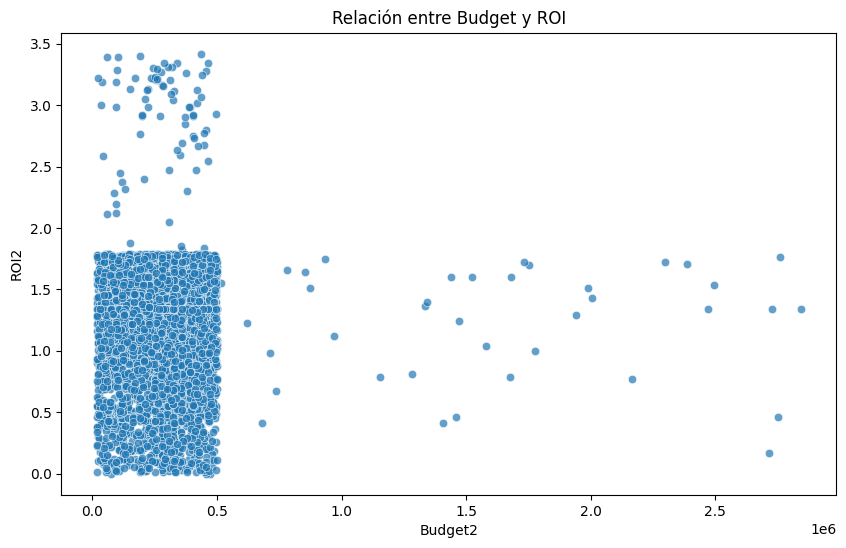

In [127]:
#Visualizar relacion entre Budget & ROI
# Gráfico de dispersión de Budget vs ROI
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df3, x='Budget2', y='ROI2', alpha=0.7)
plt.title('Relación entre Budget y ROI')
plt.xlabel('Budget2')
plt.ylabel('ROI2')
plt.show()

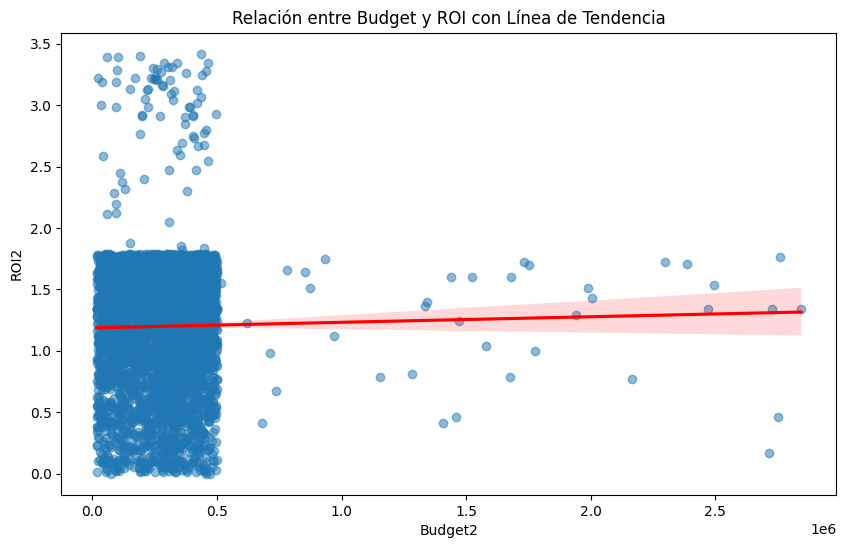

In [128]:

# Gráfico de dispersión con línea de regresión
plt.figure(figsize=(10, 6))
sns.regplot(data=df3, x='Budget2', y='ROI2', scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.title('Relación entre Budget y ROI con Línea de Tendencia')
plt.xlabel('Budget2')
plt.ylabel('ROI2')
plt.show()

In [ ]:
# Agrupar por región y calcular los ingresos totales y el ROI promedio por región
revenue_roi_por_region = df3.groupby('Region').agg({
    'Revenue': 'sum',  # Ingresos totales por región
    'ROI': 'mean'      # ROI promedio por región
}).reset_index()

# Ordenar la tabla por la columna 'Revenue' de mayor a menor
revenue_roi_por_region = revenue_roi_por_region.sort_values(by='Revenue', ascending=False)

# Mostrar la tabla de ingresos y ROI por región
revenue_roi_por_region


Region       Revenue       ROI
2  kuala lumpur  4.614528e+08  2.711664
5       sarawak  4.611481e+08  2.877836
3        penang  4.345109e+08  2.929835
1         johor  4.344644e+08  2.814741
4         sabah  4.327320e+08  2.786581
0       Unknown  1.246886e+08  2.700582

In [150]:
roi_promedio_por_canal = df3.groupby('Channel')['ROI'].mean().reset_index()

In [151]:
import plotly.express as px

# Crear el gráfico de barras interactivo
fig = px.bar(
    roi_promedio_por_canal,
    x='Channel',         # Eje x: los canales de marketing
    y='ROI',             # Eje y: ROI promedio
    title="ROI Promedio por Canal",
    text='ROI',          # Mostrar el ROI promedio sobre cada barra
    labels={'ROI': 'ROI Promedio', 'Channel': 'Canal'}
)

# Ajustes de diseño opcionales
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')  # Formato del texto
fig.update_layout(yaxis_title="ROI", xaxis_title="Canal", template="plotly_white")  # Títulos y estilo

# Mostrar el gráfico interactivo
fig.show()